In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacepy
import os
from uncertainties import ufloat, unumpy
import datetime as dt
import copy
import seaborn as sns
import geopandas as gpd

%load_ext autoreload
%autoreload 2

from SpaceCherenkovSimulator import spectra_running_tools as SRT

import sketch


/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
def save_figure_for_paper(file_name:str):

    #path_to_paper_folder = "../../../../windowsHomeDir/University of Surrey/HEPI - General/HEPI/WP5000/HEPI background paper files/"
    path_to_paper_folder = "background_paper_files/"

    plt.savefig(path_to_paper_folder + file_name + ".png", bbox_inches="tight",dpi=500)
    plt.savefig(path_to_paper_folder + file_name + ".eps", bbox_inches="tight",dpi=500)

In [4]:
SRT.default_shielding_geometry.aluminium_thickness_in_mm

2.0

In [5]:
SRT.default_shielding_geometry.tantalum_thickness_in_mm

0.5

In [6]:
from tqdm import tqdm

In [7]:
def fill_between_errorbar(x_vals,y_vals,y_err,**kwargs):

    plt.plot(x_vals,
            y_vals,
            marker="o",
            ms=3,
            **kwargs)
    plt.fill_between(x_vals,
                np.array(y_vals) - np.array(y_err),
                np.array(y_vals) + np.array(y_err),
                color=plt.gca().lines[-1].get_color(),
                alpha=0.4)

In [8]:
index_for_horns_max = 839
index_for_SAA_max = 826
index_for_polar = 847

In [9]:
spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)
spacecraft_coords_DF.columns = ['ModifiedJulianDay',
'Altitude_km',
'Latitude_deg',
'Longitude_deg',
'LocalTime_hrs',
'PitchAngle_deg']
spacecraft_coords_DF

/tmp/ipykernel_16912/1845830959.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  spacecraft_coords_DF = pd.read_csv("IRENE8_450_circ_orbit_coords.txt",skiprows=73,header=None,skipfooter=1)


,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


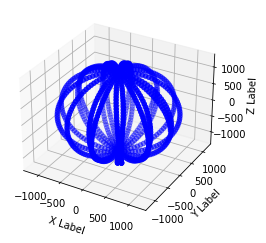

In [10]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# get the data from the dataframe
index = spacecraft_coords_DF.index
ModifiedJulianDay = spacecraft_coords_DF['ModifiedJulianDay']
Altitude_km = spacecraft_coords_DF['Altitude_km']
Latitude_deg = spacecraft_coords_DF['Latitude_deg']
Longitude_deg = spacecraft_coords_DF['Longitude_deg']
LocalTime_hrs = spacecraft_coords_DF['LocalTime_hrs']
PitchAngle_deg = spacecraft_coords_DF['PitchAngle_deg']

# convert coordinates to Cartesian 
x = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.cos(np.radians(Longitude_deg)) 
y = Altitude_km * np.cos(np.radians(Latitude_deg)) * np.sin(np.radians(Longitude_deg)) 
z = Altitude_km * np.sin(np.radians(Latitude_deg)) 

# plot the trajectory in 3D 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(x, y, z, c='b', marker='o') 
ax.set_xlabel('X Label') 
ax.set_ylabel('Y Label') 
ax.set_zlabel('Z Label') 
plt.show() 

In [11]:
IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)
IRENE8_450_electrons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.04,
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    1,
    1.25,
    1.5,
    1.75,
    2,
    2.25,
    2.5,
    2.75,
    3,
    3.25,
    3.5,
    3.75,
    4,
    4.25,
    4.5,
    4.75,
    5,
    5.5,
    6,
    6.5,
    7
]
IRENE8_450_electrons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_electrons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_electrons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_electrons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

IRENE8_450_electrons

/tmp/ipykernel_16912/3684036918.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_electrons = pd.read_csv("IRENE8_450_circ_orbit_electrons.txt",skiprows=76,header=None,skipfooter=1)


,Latitude_deg,Longitude_deg,0.04,0.1,0.2,0.3,0.4,0.5,0.6,0.7,...,3.75,4,4.25,4.5,4.75,5,5.5,6,6.5,7
0,0.000000,354.938757,1537300.0,1209300.0,750380.0,339930.0,112420.0,37182.0,19539.0,10268.0,...,1.6375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.313331,354.688073,729880.0,574970.0,363090.0,168080.0,57040.0,19357.0,10406.0,5594.3,...,1.5384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.626412,354.437390,387980.0,307940.0,198260.0,94564.0,33416.0,11808.0,6514.8,3594.5,...,1.9403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.939000,354.186707,287760.0,228280.0,146830.0,69917.0,24649.0,8689.6,4788.0,2638.2,...,1.4023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.250860,353.936025,201860.0,159250.0,98662.0,45200.0,15312.0,5187.2,2785.8,1496.1,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,-10.059640,81.942378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1090,-6.747288,81.691850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1091,-3.434439,81.441319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)
IRENE8_450_protons.columns = [
    "B Gauss",
    "L !8R!3!dE!n",
    0.1, 
    0.15, 
    0.2, 
    0.3, 
    0.4, 
    0.5, 
    0.6, 
    0.7, 
    1, 
    1.5, 
    2, 
    3, 
    4, 
    5, 
    6, 
    7, 
    10, 
    15, 
    20, 
    30, 
    40, 
    50, 
    60, 
    70, 
    100, 
    150, 
    200, 
    300, 
    400
]
IRENE8_450_protons["B Gauss"] = spacecraft_coords_DF["Latitude_deg"]
IRENE8_450_protons.rename(columns={"B Gauss":"Latitude_deg"},inplace=True)

IRENE8_450_protons["L !8R!3!dE!n"] = spacecraft_coords_DF["Longitude_deg"]
IRENE8_450_protons.rename(columns={"L !8R!3!dE!n":"Longitude_deg"},inplace=True)

cols_to_use = [
    "Latitude_deg",
    "Longitude_deg",
    100,
    150, 
    200, 
    300, 
    400
]

IRENE8_450_protons_original = IRENE8_450_protons.copy()
IRENE8_450_protons = IRENE8_450_protons[cols_to_use]

/tmp/ipykernel_16912/3175779400.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  IRENE8_450_protons = pd.read_csv("IRENE8_450_circ_orbit_protons.txt",skiprows=74,header=None,skipfooter=1)


In [13]:
def convert_integral_values_to_differential(integral_DF):

    differential_DF_coords = integral_DF.iloc[:,:2]

    differential_DF_energy_vals = (integral_DF.iloc[:,2:-1].columns +integral_DF.iloc[:,3:].columns)/2
    differential_DF_values = -1 * integral_DF.iloc[:,2:].diff(axis=1).iloc[:,1:] / np.diff(integral_DF.iloc[:,2:].columns)
    differential_DF_values.columns = differential_DF_energy_vals

    return pd.concat([differential_DF_coords,differential_DF_values],axis=1)

In [14]:
IRENE8_450_electrons_differential = convert_integral_values_to_differential(IRENE8_450_electrons)
IRENE8_450_protons_differential = convert_integral_values_to_differential(IRENE8_450_protons)
IRENE8_450_protons_original_differential = convert_integral_values_to_differential(IRENE8_450_protons_original)

In [15]:
IRENE8_450_electrons_differential_shortened = IRENE8_450_electrons_differential.drop(columns=IRENE8_450_electrons_differential.columns[2:11])

In [16]:
IRENE8_450_electrons_differential_shortened

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
0,0.000000,354.938757,5039.2,2607.72,922.28,618.24,504.52,302.04,199.78,111.164,...,18.7532,6.55,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1,3.313331,354.688073,2716.08,1416.32,498.24,337.44,286.28,170.52,113.232,62.176,...,11.3468,6.1536,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,6.626412,354.437390,1774.0,945.88,337.76,232.16,201.908,122.04,82.488,45.996,...,7.4096,7.7612,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
3,9.939000,354.186707,1300.24,692.28,246.88,169.56,147.344,88.964,60.068,33.452,...,5.3692,5.6092,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4,13.250860,353.936025,725.48,378.56,133.744,90.44,76.012,45.424,30.2536,16.6852,...,4.7284,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [17]:
IRENE8_450_protons_differential

,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
0,0.000000,354.938757,9.816,6.6716,4.0078,1.7372
1,3.313331,354.688073,9.078,6.3254,3.9933,1.7975
2,6.626412,354.437390,8.1354,5.7348,3.7211,1.7
3,9.939000,354.186707,6.2192,4.38,2.8863,1.2899
4,13.250860,353.936025,4.234,2.9386,1.9272,0.81285
...,...,...,...,...,...,...
1088,-13.371240,82.192904,-0.0,-0.0,-0.0,-0.0
1089,-10.059640,81.942378,-0.0,-0.0,-0.0,-0.0
1090,-6.747288,81.691850,-0.0,-0.0,-0.0,-0.0
1091,-3.434439,81.441319,-0.0,-0.0,-0.0,-0.0


## Defining running across orbit

In [18]:
def get_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [19]:
def get_single_rad_photon_inducing_event_count_per_second(output_run, threshold_photon_value=10.0):
    try:
        return output_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value)
    except AttributeError:
        return output_run

In [20]:
class orbital_run():

    def __init__(self, 
                 DF_of_coordinates_and_spectra:pd.DataFrame, 
                 particle_species:str, 
                 shielding_geometry=SRT.default_shielding_geometry,
                 label=None,
                 label_for_run=None,
                 threshold_photon_value=10.0,
                 number_of_particles_to_simulate=100_000,
                 ignore_coincidence_horns_regions=True,
                 **kwargs):

        self.run_dict = {}

        self.label = label

        self.ignore_coincidence_horns_regions = ignore_coincidence_horns_regions

        self.DF_of_coordinates_and_spectra = DF_of_coordinates_and_spectra

        for index, spectrum_row in tqdm(DF_of_coordinates_and_spectra.iterrows()):

            self.run_dict[index] = self.run_Cherenkov_simulation_across_row(particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row, **kwargs)

        self.run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

        horns_region_lower_limit = -50.0
        horns_region_upper_limit = 45.0
        if self.ignore_coincidence_horns_regions is True:
            for index, spectrum_row in tqdm(DF_of_coordinates_and_spectra.iterrows()):
                if not ((spectrum_row["Latitude_deg"] <=horns_region_upper_limit) & (spectrum_row["Latitude_deg"] >=horns_region_lower_limit)):
                    self.run_dict_event_counts[index] = ufloat(0.0,0.0)

        self.single_rad_run_dict_event_counts = pd.Series(self.run_dict).apply(lambda x:get_single_rad_photon_inducing_event_count_per_second(x,
                                                                                                                        threshold_photon_value=threshold_photon_value))

    def run_Cherenkov_simulation_across_row(self, particle_species, shielding_geometry, label_for_run, number_of_particles_to_simulate, spectrum_row, **kwargs):
        
        file_path_to_use = f"file_path_for_spectrum_row.csv"

        spectrum_row[2:].to_csv(file_path_to_use,header=None,sep=" ")

        max_particles_per_s = np.trapz(spectrum_row[2:].values, spectrum_row[2:].index)

        if max_particles_per_s > 0.0:

            row_as_a_spectrum = SRT.particle_spectrum(particle_species=SRT.particle(particle_species),
                                                        spectrum_file_path=file_path_to_use,
                                                        incoming_particles_per_s_per_cm2=max_particles_per_s)
                                                        
            Cherenkov_run_for_row = SRT.wrapper_gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
            #Cherenkov_run_for_row = SRT.gras_Cherenkov_runner_from_objects(row_as_a_spectrum,
                                                shielding_geometry,
                                                #SRT.no_shielding_geometry,
                                                Cherenkov_run_label = label_for_run,
                                                number_of_particles=number_of_particles_to_simulate,
                                                number_of_radiators=2,
                                                **kwargs);

        else:
            Cherenkov_run_for_row = ufloat(0.0,0.0)

        os.remove(file_path_to_use)
        return Cherenkov_run_for_row

    def plot_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.run_dict_event_counts.apply(lambda x:x.n),
                self.run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def plot_single_rad_run_dict(self, xvalues_to_use = None, error_bar_function=plt.errorbar):

        if xvalues_to_use is None:
            xvalues_to_use = self.single_rad_run_dict_event_counts.index
        elif isinstance(xvalues_to_use,str):
            if xvalues_to_use == "latitudes":
                xvalues_to_use = self.DF_of_coordinates_and_spectra["Latitude_deg"]

        error_bar_function(xvalues_to_use,
                self.single_rad_run_dict_event_counts.apply(lambda x:x.n),
                self.single_rad_run_dict_event_counts.apply(lambda x:x.std_dev),
                label=self.label)
        plt.yscale("log")
        plt.grid(True)
        plt.ylabel("cts / second")
        plt.xlabel("Latitude (degrees)")

    def __add__(self, right):

        output_orbital_run = copy.deepcopy(self)

        output_orbital_run.run_dict = {0:self.run_dict, 1:right.run_dict}

        output_orbital_run.run_dict_event_counts = self.run_dict_event_counts + right.run_dict_event_counts
        output_orbital_run.label = self.label + " plus " + right.label

        return output_orbital_run

    def print_count_rates_info(self):

        print(f"polar region count rate: {self.run_dict_event_counts[index_for_polar]} cts/s".replace("+/-","±"))
        print(f"horns region count rate: {self.run_dict_event_counts[index_for_horns_max]} cts/s".replace("+/-","±"))
        print(f"SAA region count rate: {self.run_dict_event_counts[index_for_SAA_max]} cts/s".replace("+/-","±"))

In [21]:
IRENE8_450_electrons_differential_shortened_single_orbit = IRENE8_450_electrons_differential_shortened.iloc[790:850].sample(60,random_state=1).sort_index()


In [22]:
IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
    number_of_particles_to_simulate=1_000_000, 
    particle_species="e-",
    label="AE8 electrons",
    threshold_photon_value=20.0,
    ignore_coincidence_horns_regions=False)

60it [00:02, 20.60it/s]


In [23]:
IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple.number_of_events_simulated

1000000

In [24]:
IRENE8_450_electrons_orbital_run.run_dict_event_counts

790              0.0+/-0
791              0.0+/-0
792              0.0+/-0
793              0.0+/-0
794              0.0+/-0
795              0.0+/-0
796              0.0+/-0
797              0.0+/-0
798              0.0+/-0
799        0.000+/-0.011
800            0.0+/-0.5
801            0.0+/-2.0
802                8+/-6
803                9+/-5
804           10.5+/-1.9
805        0.000+/-0.004
806    0.00000+/-0.00024
807      0.0000+/-0.0015
808        0.000+/-0.005
809        0.030+/-0.030
810          0.00+/-0.09
811            0.5+/-0.4
812          0.30+/-0.30
813          0.16+/-0.16
814          0.00+/-0.10
815          0.00+/-0.08
816          0.00+/-0.10
817          0.00+/-0.14
818          0.17+/-0.17
819          0.00+/-0.23
820            0.4+/-0.4
821            0.0+/-0.7
822            0.0+/-0.9
823            0.0+/-2.3
824                4+/-4
825                7+/-7
826                8+/-8
827                6+/-6
828            0.0+/-3.4
829            0.0+/-1.9


/tmp/ipykernel_16912/141704542.py:3: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f7870e7cd90> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["AE-8 electrons, single radiator","_","AE-8 electrons, coincidence","_"])
/tmp/ipykernel_16912/141704542.py:3: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f7870e7cc40> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["AE-8 electrons, single radiator","_","AE-8 electrons, coincidence","_"])


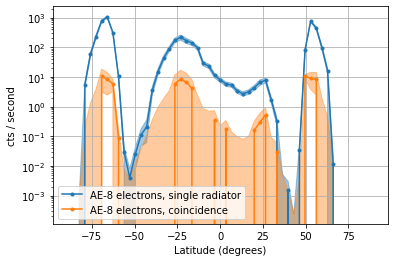

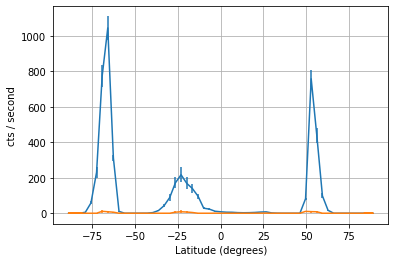

In [148]:
IRENE8_450_electrons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
plt.legend(["AE-8 electrons, single radiator","_","AE-8 electrons, coincidence","_"])

plt.figure()

IRENE8_450_electrons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes")
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes")

plt.yscale("linear")

In [26]:
dir(IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'coincidence_tuple_dictionary',
 'construct_hits_dictionary',
 'convert_to_theta_phi_DF',
 'determine_pulse_height_distributions',
 'generated_photons_DF',
 'generated_primary_DF',
 'get_coincidence_DF',
 'get_coincidence_events',
 'get_coincidence_tuple',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'get_relevant_hit_key',
 'hits',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'output_tuples',
 'plot_coincidence_pulse_height_distribution',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 '

In [27]:
IRENE8_450_electrons_orbital_run.run_dict[800].outputted_tuple.output_tuples

{'RA1_tuple_interaction;1': <SpaceCherenkovSimulator.Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f79a8c1b5b0>,
 'FL1_tuple_fluence;1_CK': <SpaceCherenkovSimulator.Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f79a8c4efa0>,
 'RA2_tuple_interaction;1': <SpaceCherenkovSimulator.Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f79a8c4eee0>,
 'FL2_tuple_fluence;1_CK': <SpaceCherenkovSimulator.Cherenkov_run_tuple.Cherenkov_run_tuple at 0x7f79a8bcd640>}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


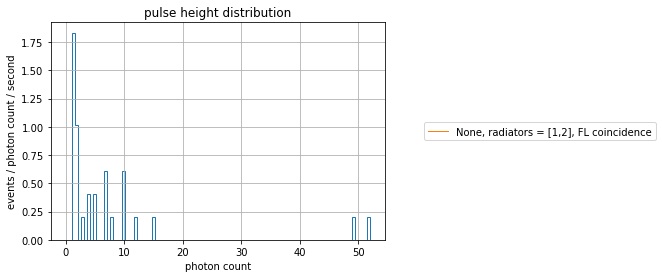

In [28]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [29]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

0.7273088585955116+/-0.27489690945399514

In [30]:
IRENE8_450_electrons_orbital_run.run_dict[832].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

0.0+/-0.10390126551364452

In [31]:
IRENE8_450_protons_differential_single_orbit = IRENE8_450_protons_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_differential_single_orbit.head()


,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0


In [32]:
IRENE8_450_protons_original_differential_single_orbit = IRENE8_450_protons_original_differential.iloc[790:850].sample(60,random_state=1).sort_index()
IRENE8_450_protons_original_differential_single_orbit.head()

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [33]:
IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit, 
                                            particle_species="proton",
                                            #number_of_particles_to_simulate=1_000_000,
                                            #number_of_particles_to_simulate=100_000,
                                            number_of_particles_to_simulate=20_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            ignore_coincidence_horns_regions=True)

60it [00:01, 31.50it/s] 
60it [00:00, 10155.70it/s]


/tmp/ipykernel_16912/4237927462.py:3: UserWarning: The handle <matplotlib.collections.PolyCollection object at 0x7f79a5695520> has a label of '_' which cannot be automatically added to the legend.
  plt.legend(["AP-8 protons, single radiator","_","AP-8 protons, coincidence"])


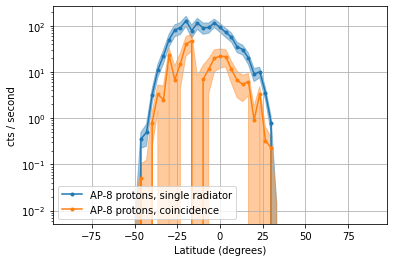

In [34]:
IRENE8_450_protons_orbital_run.plot_single_rad_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use = "latitudes",error_bar_function=fill_between_errorbar)
plt.legend(["AP-8 protons, single radiator","_","AP-8 protons, coincidence"])

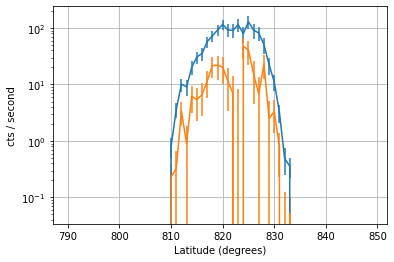

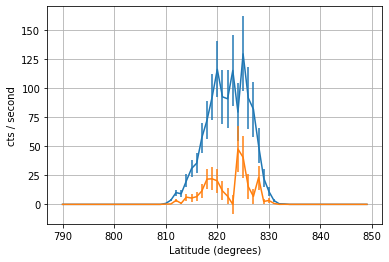

In [35]:
IRENE8_450_protons_orbital_run.plot_single_rad_run_dict()
IRENE8_450_protons_orbital_run.plot_run_dict()

plt.figure()

IRENE8_450_protons_orbital_run.plot_single_rad_run_dict()
IRENE8_450_protons_orbital_run.plot_run_dict()

plt.yscale("linear")

In [36]:
dir(IRENE8_450_protons_orbital_run)

['DF_of_coordinates_and_spectra',
 '__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ignore_coincidence_horns_regions',
 'label',
 'plot_run_dict',
 'plot_single_rad_run_dict',
 'print_count_rates_info',
 'run_Cherenkov_simulation_across_row',
 'run_dict',
 'run_dict_event_counts',
 'single_rad_run_dict_event_counts']

In [37]:
IRENE8_450_protons_orbital_run.run_dict

{790: 0.0+/-0,
 791: 0.0+/-0,
 792: 0.0+/-0,
 793: 0.0+/-0,
 794: 0.0+/-0,
 795: 0.0+/-0,
 796: 0.0+/-0,
 797: 0.0+/-0,
 798: 0.0+/-0,
 799: 0.0+/-0,
 800: 0.0+/-0,
 801: 0.0+/-0,
 802: 0.0+/-0,
 803: 0.0+/-0,
 804: 0.0+/-0,
 805: 0.0+/-0,
 806: 0.0+/-0,
 807: 0.0+/-0,
 808: 0.0+/-0,
 809: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a5485100>,
 810: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a53bea60>,
 811: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a537a580>,
 812: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a53b3940>,
 813: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a536ba30>,
 814: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a5324a30>,
 815: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov

In [38]:
IRENE8_450_protons_orbital_run.run_dict

{790: 0.0+/-0,
 791: 0.0+/-0,
 792: 0.0+/-0,
 793: 0.0+/-0,
 794: 0.0+/-0,
 795: 0.0+/-0,
 796: 0.0+/-0,
 797: 0.0+/-0,
 798: 0.0+/-0,
 799: 0.0+/-0,
 800: 0.0+/-0,
 801: 0.0+/-0,
 802: 0.0+/-0,
 803: 0.0+/-0,
 804: 0.0+/-0,
 805: 0.0+/-0,
 806: 0.0+/-0,
 807: 0.0+/-0,
 808: 0.0+/-0,
 809: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a5485100>,
 810: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a53bea60>,
 811: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a537a580>,
 812: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a53b3940>,
 813: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a536ba30>,
 814: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f79a5324a30>,
 815: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov

In [39]:
IRENE8_450_protons_orbital_run.run_dict[809].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20)

0.0+/-0.014194469591155546

In [40]:
dir(IRENE8_450_protons_orbital_run.run_dict[809].outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'coincidence_tuple_dictionary',
 'construct_hits_dictionary',
 'convert_to_theta_phi_DF',
 'determine_pulse_height_distributions',
 'generated_photons_DF',
 'generated_primary_DF',
 'get_coincidence_DF',
 'get_coincidence_events',
 'get_coincidence_tuple',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'get_relevant_hit_key',
 'hits',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'output_tuples',
 'plot_coincidence_pulse_height_distribution',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 '

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


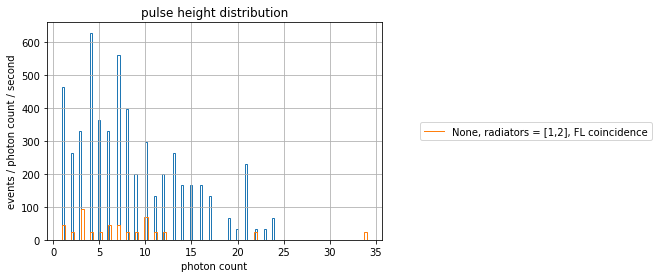

In [41]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [42]:
dir(IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'])

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primary_energy']

In [43]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)


457.24272577560794+/-59.02978207011382

In [44]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

53.344984673820925+/-20.16250901992603

In [45]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

15.241424192520265+/-10.777314401471779

60it [00:04, 14.55it/s]
60it [00:01, 31.02it/s]
60it [00:02, 28.92it/s] 
60it [00:01, 30.24it/s]
60it [00:01, 33.88it/s]


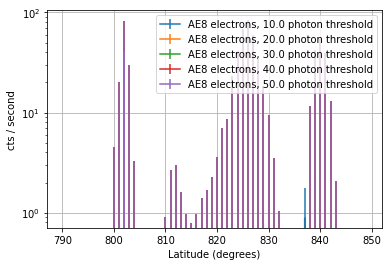

In [46]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit, 
                particle_species="e-",
                label=f"AE8 electrons, {photon_threshold} photon threshold",
                threshold_photon_value=photon_threshold,
                ignore_coincidence_horns_regions=False).plot_run_dict()
plt.legend()

0it [00:00, ?it/s]

60it [00:02, 23.82it/s]
60it [00:00, 13041.31it/s]
60it [00:01, 52.65it/s] 
60it [00:00, 16453.63it/s]
60it [00:01, 54.81it/s] 
60it [00:00, 12920.79it/s]
60it [00:01, 54.33it/s] 
60it [00:00, 13586.99it/s]
60it [00:00, 60.01it/s] 
60it [00:00, 13637.80it/s]


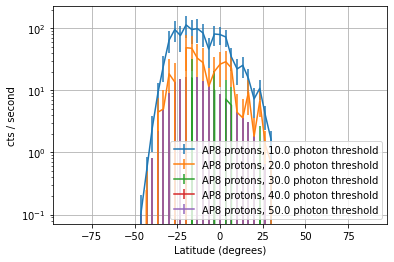

In [47]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    orbital_run(IRENE8_450_protons_differential_single_orbit, 
                particle_species="proton",
                #number_of_particles_to_simulate=1_000_000,
                number_of_particles_to_simulate=10_000,
                label=f"AP8 protons, {photon_threshold} photon threshold",
                threshold_photon_value=photon_threshold).plot_run_dict(xvalues_to_use="latitudes",error_bar_function=fill_between_errorbar)
plt.legend()

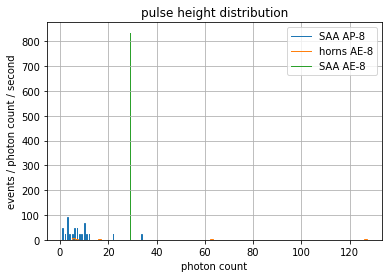

In [48]:
IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plt.legend(["SAA AP-8","horns AE-8","SAA AE-8"])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


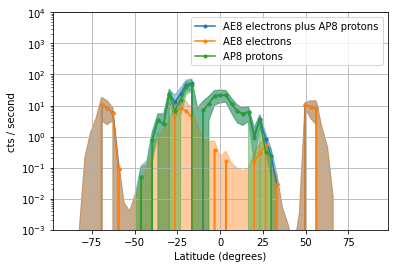

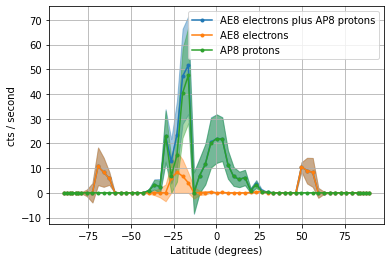

In [49]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
plt.legend()
#plt.legend(["total","electrons","protons"])
plt.ylim([1e-3,1e4])
save_figure_for_paper("HEPI_background_output_coincidence")

plt.figure()
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_electrons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
IRENE8_450_protons_orbital_run.plot_run_dict(xvalues_to_use="latitudes", error_bar_function=fill_between_errorbar)
#plt.legend(["total","electrons","protons"])
plt.legend()
plt.yscale("linear")

In [50]:
default_rigidities = np.concatenate([[0,1,2,3,4],np.linspace(5,20,5)])

In [51]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

In [52]:
array_of_GCR_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                         SRT.get_GCR_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,
                                                                                    datetime_to_use=SRT.datetime_for_GCR_solar_max)] for rigidity_cut_off_GV in default_rigidities])

In [53]:
array_of_GLE21_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                           SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,
                                                                                      GLE_spec=GLE21_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [54]:
array_of_GLE21_rig_cutoff_runs

array([[0.0,
       [1.0,
       [2.0,
       [3.0,
       [4.0,
       [5.0,
       [8.75,
       [12.5,
       [16.25,
       [20.0,
      dtype=object)

In [55]:
array_of_GLE05_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,SRT.get_GLE_Cherenkov_run_rigidity_cut_off(rigidity_cut_off_GV,GLE_spec=GLE05_spectrum)] for rigidity_cut_off_GV in default_rigidities])

In [56]:
from AsympDirsCalculator import AsympDirsTools
from scipy.interpolate import interp1d
import datetime as dt

In [57]:
def uncertainty_interp1d(x, y, **kwargs):

    n_interp = interp1d(x,[uy_value.n for uy_value in y], **kwargs)
    std_dev_interp = interp1d(x,[uy_value.std_dev for uy_value in y], **kwargs)

    return lambda x_arg:(ufloat(n_interp(x_arg),std_dev_interp(x_arg)) if np.isscalar(x_arg) else unumpy.uarray(n_interp(x_arg),std_dev_interp(x_arg)))

In [58]:
acquire_count_rate_multi = np.vectorize(lambda output_run,threshold_photon_value=10.0:output_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=threshold_photon_value))


In [59]:
class multi_rigidity_run():

    def __init__(self, rigidity_run_class, array_of_rigidities_GV=default_rigidities, input_DF_of_coords=None, label=None, threshold_photon_value=10.0, **kwargs):

        self.label = label

        if input_DF_of_coords is None:
            self.array_of_lats_and_longs = np.linspace([-90,0],[90,0],100)
        else:
            self.array_of_lats_and_longs = input_DF_of_coords[["Latitude_deg","Longitude_deg"]].to_numpy()

        self.array_of_rig_cutoff_runs =np.array([[rigidity_cut_off_GV,
                                                  rigidity_run_class(rigidity_cut_off_GV,**kwargs)] for rigidity_cut_off_GV in array_of_rigidities_GV])

        self.array_of_count_rates = np.transpose([self.array_of_rig_cutoff_runs[:,0],
                                                  acquire_count_rate_multi(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])
                                                  #SRT.acquire_count_rate(self.array_of_rig_cutoff_runs[:,1],threshold_photon_value=threshold_photon_value)])

        # self.rig_interp = interp1d(self.array_of_count_rates[:,0], 
        #                       np.vectorize(lambda x:x.nominal_value)(self.array_of_count_rates[:,1]),
        #                       fill_value="extrapolate")
        self.rig_interp = uncertainty_interp1d(self.array_of_count_rates[:,0], 
                              (self.array_of_count_rates[:,1]),
                              fill_value="extrapolate")

    def plot_count_rates(self):

        SRT.error_bar_from_array(self.array_of_count_rates)
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("cts / second")

    def get_count_rates_for_coord_array(self, array_of_lats_and_longs:np.array, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)
        vcutoffs_to_compare_to = vcutoffs_to_compare_to[
            #np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -81.194370) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 72.753770) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -56.147930) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -69.295260) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 39.842640) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 42.992710) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != -3.229399) &
            np.array(vcutoffs_to_compare_to.reset_index()["initialLatitude"] != 33.233800)]  
        vcutoffs_to_compare_to.iloc[5] = vcutoffs_to_compare_to.iloc[4]

        DF_of_count_rates = vcutoffs_to_compare_to["Reffective"].apply(self.rig_interp).reset_index().rename(columns={"Reffective":"count rate"})

        return DF_of_count_rates

    def plot_count_rates_against_longitude_0(self, datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,plot_error_bars=False,**kwargs):

        DF_of_count_rates = self.get_count_rates_for_coord_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities)
        
        series_of_latitudes = DF_of_count_rates["initialLatitude"]
        series_of_count_rates = DF_of_count_rates["count rate"].apply(lambda x:x.n)
        series_of_count_rates_errs = DF_of_count_rates["count rate"].apply(lambda x:x.std_dev)
        
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_count_rates,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_count_rates - series_of_count_rates_errs,
            #             series_of_count_rates + series_of_count_rates_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_count_rates,
                        series_of_count_rates_errs,
                        label=self.label,**kwargs)

        plt.xlabel("Latitude (degrees)")
        plt.ylabel("cts / second")
        plt.grid(True)

    def get_int_time_array(self,background_multi_rigidity_run=0):

        if background_multi_rigidity_run == 0:
            bkg_array_of_count_rates = np.zeros(np.shape(self.array_of_count_rates))
        elif isinstance(background_multi_rigidity_run,SRT.gras_Cherenkov_runner_from_objects):
            bkg_array_of_count_rates = np.full(np.shape(self.array_of_count_rates),background_multi_rigidity_run.get_total_photon_inducing_event_count_per_second())
        else:
            bkg_array_of_count_rates = background_multi_rigidity_run.array_of_count_rates

        int_time_array = np.array([[self.array_of_count_rates[index,0],
                                    SRT.get_integration_time_for_sigma(3,self.array_of_count_rates[index,1],
                                    bkg_array_of_count_rates[index,1])] for index in range(0,len(self.array_of_count_rates))])

        return int_time_array

    def plot_int_time_array(self,background_multi_rigidity_run=0):

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        SRT.error_bar_from_array(int_time_array, label=self.label)

        plt.axhline(60,ls="--")
        plt.xlabel("Cut-off rigidity (GV)")
        plt.ylabel("required integration time\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")

    def get_count_rates_for_int_time_array(self, 
                                           array_of_lats_and_longs:np.array, 
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max, 
                                           background_multi_rigidity_run=0):

        vcutoffs_to_compare_to = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = array_of_lats_and_longs,
                                 dateAndTime=datetime_for_rigidities,cache=True)

        int_time_array = self.get_int_time_array(background_multi_rigidity_run)

        time_array_rig_interp = uncertainty_interp1d(int_time_array[:,0], 
                              (int_time_array[:,1]))

        DF_of_int_times = vcutoffs_to_compare_to["Reffective"].apply(time_array_rig_interp).reset_index().rename(columns={"Reffective":"int time"})

        return DF_of_int_times

    def plot_int_time_array_vs_longitude_0(self,
                                           datetime_for_rigidities=SRT.datetime_for_GCR_solar_max,
                                           background_multi_rigidity_run=0,
                                           plot_error_bars=False,
                                           **kwargs):

        DF_of_int_times = self.get_count_rates_for_int_time_array(array_of_lats_and_longs = self.array_of_lats_and_longs, 
                                                            datetime_for_rigidities=datetime_for_rigidities,
                                                            background_multi_rigidity_run=background_multi_rigidity_run)
        
        series_of_latitudes = DF_of_int_times["initialLatitude"]
        series_of_int_times = DF_of_int_times["int time"].apply(lambda x:x.n)
        series_of_int_times_errs = DF_of_int_times["int time"].apply(lambda x:x.std_dev)

        #DF_of_int_times.plot("initialLatitude","int time",ax=plt.gca())
        if plot_error_bars == True:
            plt.errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)
        else:
            # plt.plot(series_of_latitudes,
            #             series_of_int_times,
            #             label=self.label,
            #             marker="o",
            #             ms=3,
            #             **kwargs)
            # plt.fill_between(series_of_latitudes,
            #             series_of_int_times - series_of_int_times_errs,
            #             series_of_int_times + series_of_int_times_errs,
            #             color=plt.gca().lines[-1].get_color(),
            #             alpha=0.4,
            #             label=self.label)
            
            fill_between_errorbar(series_of_latitudes,
                        series_of_int_times,
                        series_of_int_times_errs,
                        label=self.label,**kwargs)

        plt.axhline(60,ls="--")
        plt.xlabel("Latitude (degrees)")
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid()



running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


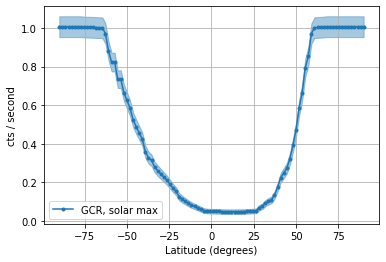

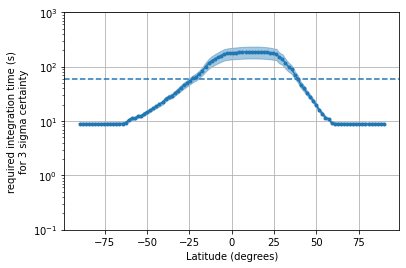

In [60]:
GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                                            #input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0, 
                                            label = "GCR, solar max",
                                           number_of_radiators=2)
GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


(0.1, 10000.0)

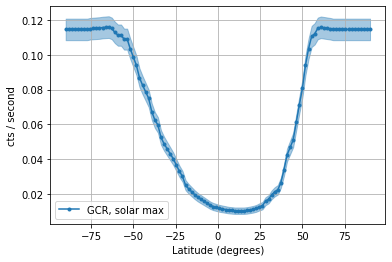

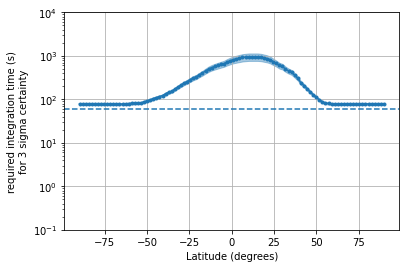

In [61]:
alpha_GCR_max_multi_rig_run = multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                                            datetime_to_use=SRT.datetime_for_GCR_solar_max,
                                            #input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                                            threshold_photon_value=20.0,
                                            label = "GCR, solar max",
                                            atomic_number_for_cosmic_rays = 2,
                                            number_of_radiators=2)
alpha_GCR_max_multi_rig_run.plot_count_rates_against_longitude_0()
plt.legend()
plt.figure()
alpha_GCR_max_multi_rig_run.plot_int_time_array_vs_longitude_0() #marker="o",ms=3,mfc="black",ecolor="black")
plt.ylim([1e-1,1e4])

In [62]:
alpha_GCR_max_multi_rig_run.array_of_rig_cutoff_runs

array([[0.0,
       [1.0,
       [2.0,
       [3.0,
       [4.0,
       [5.0,
       [8.75,
       [12.5,
       [16.25,
       [20.0,
      dtype=object)

In [63]:
alpha_GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.35804422172251904+/-0.010935515905706475

In [64]:
alpha_GCR_max_multi_rig_run.array_of_count_rates

array([[0.0, 0.11456079109218659+/-0.006185701290382641],
       [1.0, 0.11589677699413628+/-0.0062216649730111265],
       [2.0, 0.10821485805792552+/-0.006011936558773641],
       [3.0, 0.08450110829831839+/-0.005312539161871609],
       [4.0, 0.0654633091955352+/-0.004675950656823942],
       [5.0, 0.051101460749575944+/-0.004131308241056012],
       [8.75, 0.02404774623509456+/-0.002834054072514772],
       [12.5, 0.013359859019496979+/-0.0021123791860177166],
       [16.25, 0.0070139259852359135+/-0.0015305641307695854],
       [20.0, 0.005677940083286216+/-0.001377102747018671]], dtype=object)

In [65]:
alpha_GCR_max_multi_rig_run.rig_interp(0.0)

0.11456079109218659+/-0.006185701290382641

## testing coincidence normalisation

In [66]:
dir(GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_particle_spectrum_and_generate_GRAS_file',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

In [67]:
single_radiator_run = SRT.wrapper_GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           number_of_particles=10_010)

In [68]:
single_radiator_run.incoming_particles_per_s

29.005043285823753

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


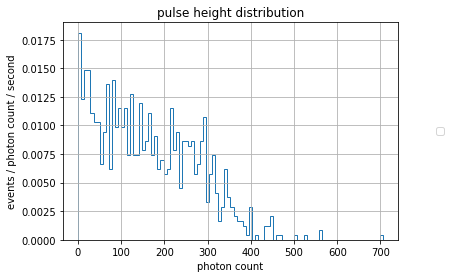

In [69]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()

In [70]:
alpha_single_radiator_run = SRT.wrapper_GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           atomic_number_for_cosmic_rays = 2,
                                           number_of_particles=10_010)

In [71]:
alpha_single_radiator_run.incoming_particles_per_s

3.3399647548742446

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


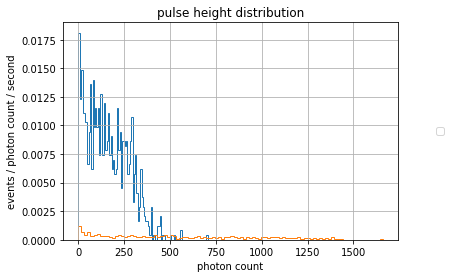

In [72]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


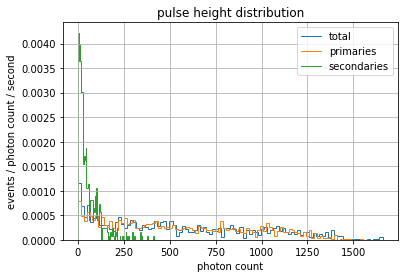

In [73]:
alpha_single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
alpha_single_radiator_run.outputted_tuple.secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
plt.legend(["total","primaries","secondaries"])

In [74]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

2.932378002522841+/-0.09217851274101842

In [75]:
alpha_single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.33466380111277394+/-0.010567159749890752

In [76]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0) / \
    alpha_single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

8.76216069013899+/-0.3903983881934156

In [77]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].incoming_particles_per_s

29.005043285823753

In [78]:
dir(single_radiator_run.outputted_tuple)

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primary_energy']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


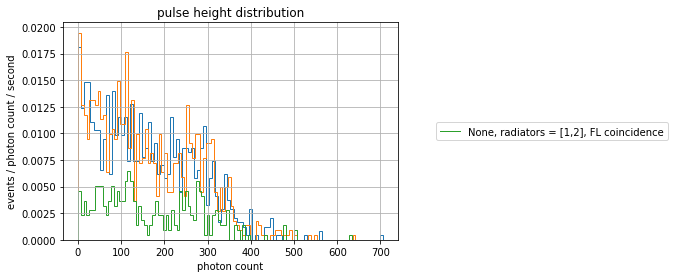

In [79]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [80]:
GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)


3.1093406402403065+/-0.09496660458315914

In [81]:
3 * GCR_max_multi_rig_run.array_of_rig_cutoff_runs[0,1].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

3.115141648897471+/-0.16464035201105184

In [82]:
single_radiator_run = SRT.GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=1,
                                           #verbose_output=True,
                                           save_DF_of_output_hits = True)

successfully read in data...
assigned wavelengths and detector detection probabilities...


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

calculated pulse height values.


In [83]:
multi_radiator_run = SRT.GCR_Cherenkov_runner(datetime_for_GCR=SRT.datetime_for_GCR_solar_max,
                                           number_of_radiators=2,
                                           #verbose_output=True,
                                           save_DF_of_output_hits = True)

/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:347: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_photons_DF["wavelength_nm"])
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:345: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photon

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


In [84]:
dir(single_radiator_run)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'calculate_Cherenkov_tuple',
 'directory_to_run_in',
 'generated_geometry',
 'generated_macro',
 'generation_surface_area_cm2',
 'generation_surface_radius',
 'get_particle_spectrum_and_generate_GRAS_file',
 'get_total_photon_inducing_event_count_per_second',
 'incoming_particles_per_s',
 'initialise_dir_and_copy_geom_and_mac_files',
 'initialise_output_gras_directory',
 'initialise_running_directory_and_macro',
 'outputted_tuple',
 'plot_pulse_height_distribution',
 'run_gras_simulation',
 'setup_input_variables',
 'verbose_output']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


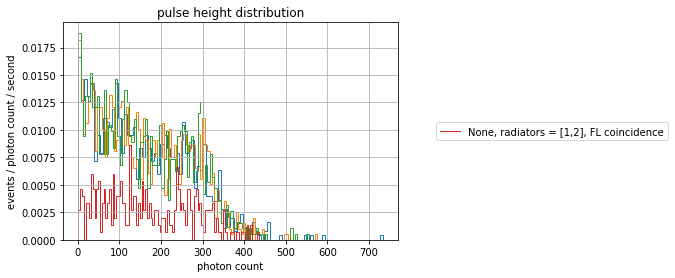

In [85]:
single_radiator_run.outputted_tuple.plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

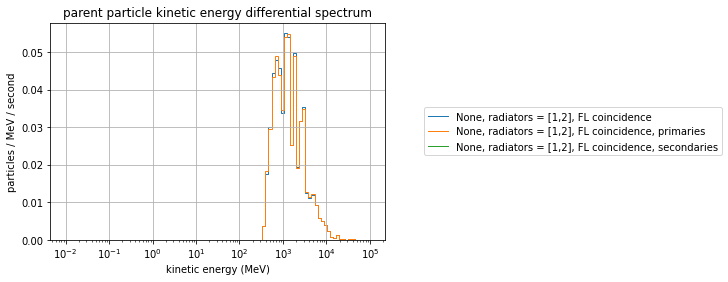

In [86]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_differential_primary_spectra()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()

In [87]:
np.min(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series)

336.08783

In [88]:
np.min(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.kinetic_energies_series)

336.08783

In [89]:
np.max(multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.kinetic_energies_series)

nan

In [90]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"]

In [91]:
single_radiator_run.outputted_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=10.0)

3.060032066654406+/-0.09421059523711743

In [92]:
multi_radiator_run.outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.98907197604659+/-0.05356125043165681

In [93]:
single_radiator_run.outputted_tuple.DF_of_output_hits

,primary_or_secondary,atomic_number,atomic_mass,particle_id,event_id,reaction_order_rnb,primary_kinetic_energy,kinetic_energy,total_energy,x_momentum,y_momentum,z_momentum,time,event_weight,cross_section
0,1,1,1,2212.0,6,1,3583.8793,3.583879e+03,4.522403e+03,2.141201e+03,-6.198189e+02,-3.821071e+03,0.051121,1,1
1,2,0,0,-22.0,6,1,3583.8793,NaN,4.589000e-06,-2.700000e-07,-3.220000e-06,-3.250000e-06,0.048867,1,1
2,2,0,0,-22.0,6,1,3583.8793,NaN,5.112000e-06,2.907000e-06,-3.820000e-06,-1.750000e-06,0.050904,1,1
3,2,0,0,-22.0,6,1,3583.8793,NaN,4.958000e-07,3.428000e-07,2.479000e-07,-2.580000e-07,0.050945,1,1
4,2,0,0,-22.0,6,1,3583.8793,3.076000e-07,3.076000e-07,4.034000e-08,-2.270000e-07,-2.020000e-07,0.049698,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744831,2,0,0,-22.0,9896,14,5254.7343,3.169000e-06,3.169000e-06,-5.030000e-07,-1.070000e-06,-2.930000e-06,0.087006,1,1
744832,2,0,0,-22.0,9896,14,5254.7343,NaN,4.793000e-06,3.527000e-06,-3.220000e-06,3.430000e-07,0.087088,1,1
744833,2,0,0,-22.0,9896,14,5254.7343,NaN,3.153000e-06,2.517000e-06,9.867000e-07,-1.620000e-06,0.086914,1,1
744834,2,0,0,-22.0,9896,14,5254.7343,NaN,5.159000e-06,4.089000e-06,-3.110000e-06,4.299000e-07,0.084758,1,1


In [94]:
multi_radiator_run.outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
1,66,-22,NaN,0.000005,412.535828,239.851349,0.092567
2,66,-22,NaN,0.000002,412.535828,697.040466,0.266571
3,66,-22,NaN,0.000006,412.535828,213.465424,0.031278
4,66,-22,NaN,0.000003,412.535828,464.620605,0.527126
5,66,-22,NaN,0.000004,412.535828,322.769562,0.459220
...,...,...,...,...,...,...,...
628106,9989,-22,0.000005,0.000005,4585.013184,275.179932,0.174629
628107,9989,-22,NaN,0.000005,4585.013184,231.731354,0.073706
628108,9989,-22,0.000004,0.000004,4585.013184,330.737701,0.462268
628109,9989,-22,NaN,0.000003,4585.013184,451.361969,0.551590


In [95]:
multi_radiator_run.outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
1,66,-22,0.000004,414.814178,0.000004,283.328003,0.193555
2,66,-22,0.000005,414.814178,0.000005,233.772156,0.078446
3,66,-22,0.000006,414.814178,0.000006,202.306458,0.005357
4,66,-22,0.000006,414.814178,0.000006,207.920303,0.018397
5,66,-22,0.000005,414.814178,0.000005,272.019073,0.167287
...,...,...,...,...,...,...,...
610861,9989,-22,0.000003,4587.991211,0.000003,367.354370,0.525245
610862,9989,-22,0.000005,4587.991211,0.000005,231.192703,0.072455
610863,9989,-22,0.000002,4587.991211,0.000002,512.418823,0.489426
610864,9989,-22,0.000004,4587.991211,0.000004,299.231293,0.404945


In [96]:
IRENE8_450_electrons_differential_shortened_single_orbit.head()

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
790,84.29629,156.896069,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
791,87.57371,156.643162,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
792,89.14890,336.407396,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
793,85.87130,336.147949,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
794,82.59322,335.896262,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [97]:
test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=1_000_001,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = True,
                                               ignore_coincidence_horns_regions=False)

1it [00:00,  2.39it/s]


In [98]:
test_single_IRENE8_450_electrons_orbital_run_slight_short = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.columns[:-1]][IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_001,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = True,
                                               ignore_coincidence_horns_regions=False)

0it [00:00, ?it/s]

1it [00:00, 10.99it/s]


In [99]:
test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                            particle_species="proton",
                                            number_of_particles_to_simulate=100_001, #100_000, #1_000_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            save_DF_of_output_hits = True)

1it [00:00,  1.75it/s]
1it [00:00, 2528.21it/s]


In [100]:
test_single_IRENE8_450_protons_orbital_run_slight_short = orbital_run(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.columns[:-1]][IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max], 
                                            particle_species="proton",
                                            number_of_particles_to_simulate=100_001, #100_000, #1_000_000,
                                            label="AP8 protons",
                                            threshold_photon_value=20.0,
                                            save_DF_of_output_hits = True)

0it [00:00, ?it/s]

1it [00:00,  2.90it/s]
1it [00:00, 2047.00it/s]


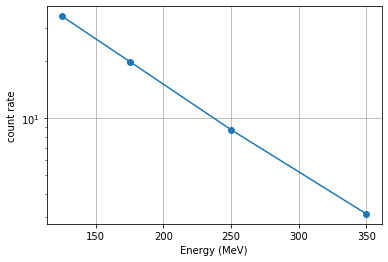

In [101]:
plt.plot(IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].columns[2:],
        IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == index_for_SAA_max].values[0][2:],marker="o")
plt.yscale("log")
plt.xlabel("Energy (MeV)")
plt.ylabel("count rate")
plt.grid(True)

In [102]:
IRENE8_450_protons_differential_single_orbit[IRENE8_450_protons_differential_single_orbit.index == 825]

,Latitude_deg,Longitude_deg,125.0,175.0,250.0,350.0
825,-19.81355,328.124158,36.086,21.116,9.3537,3.4778


In [103]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

96.02001221275555+/-12.097384438111238

In [104]:
test_single_IRENE8_450_protons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

3.6808064546027506+/-2.12511459739981

In [105]:
3 * test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

41.15143380546667+/-13.717144601822222

In [106]:
3 * test_single_IRENE8_450_protons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-3.6808064546027506

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


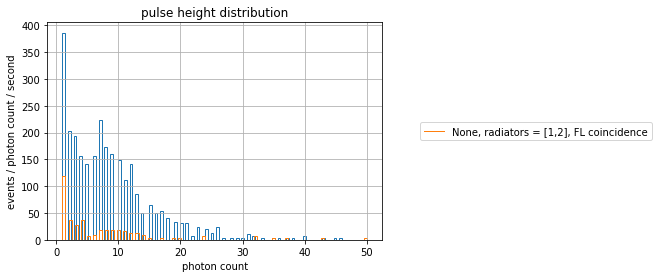

In [107]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


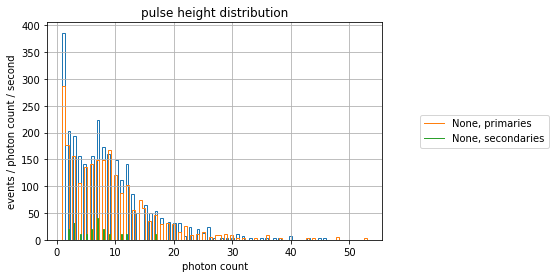

In [108]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


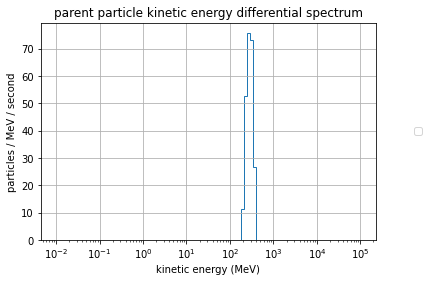

In [109]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_differential_primary_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


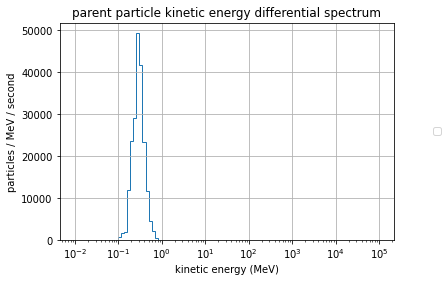

In [110]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_differential_primary_spectra()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


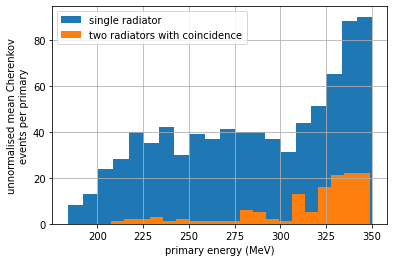

In [111]:
plt.hist(np.unique(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="single radiator")
plt.hist(np.unique(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="two radiators with coincidence")

plt.xlabel("primary energy (MeV)")
plt.ylabel("unnormalised mean Cherenkov\nevents per primary")
plt.grid(True)

plt.legend()

save_figure_for_paper("delta_proton_spectra")

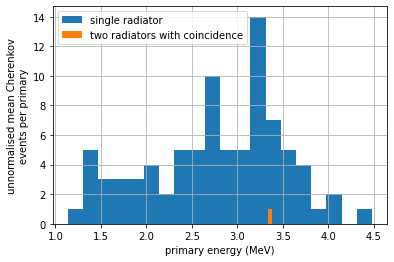

In [112]:
plt.hist(np.unique(test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="single radiator")
plt.hist(np.unique(test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.kinetic_energies_series),
         bins=20,label="two radiators with coincidence")

plt.xlabel("primary energy (MeV)")
plt.ylabel("unnormalised mean Cherenkov\nevents per primary")
plt.grid(True)

plt.legend()

In [112]:
proton_test_DF_1 = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits
proton_test_DF_1_PR = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.hits['FL1_tuple_fluence;1_PR']
proton_test_DF_1_RA = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits
proton_test_DF_1

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
10,604,-22,0.000006,329.665100,0.000006,213.391113,0.031105
11,604,-22,0.000006,329.665100,0.000006,215.076431,0.035020
12,604,-22,0.000006,329.665100,0.000006,200.372864,0.000866
13,604,-22,0.000006,329.665100,0.000006,216.133194,0.037474
14,604,-22,0.000006,329.665100,0.000006,214.630997,0.033985
...,...,...,...,...,...,...,...
55426,98771,-22,0.000005,334.789856,0.000005,259.402252,0.137980
55427,98771,-22,0.000005,334.789856,0.000005,227.035248,0.062798
55428,98771,-22,0.000006,334.789856,0.000006,209.547546,0.022177
55429,98771,-22,0.000006,334.789856,0.000006,205.959976,0.013844


In [113]:
proton_test_DF_2 = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL2_tuple_fluence;1_CK'].DF_of_output_hits
proton_test_DF_2_PR = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.hits['FL2_tuple_fluence;1_PR']
proton_test_DF_2_RA = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA2_tuple_interaction;1'].DF_of_output_hits
proton_test_DF_2

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
8,799,-22,0.000005,304.001312,0.000005,245.593277,0.105904
9,799,-22,0.000004,304.001312,0.000004,340.792328,0.467907
10,799,-22,0.000005,304.001312,0.000005,230.407608,0.070631
11,799,-22,0.000003,304.001312,0.000003,361.936737,0.512692
12,799,-22,0.000005,304.001312,0.000005,246.908066,0.108958
...,...,...,...,...,...,...,...
56001,95382,-22,0.000005,331.498230,0.000005,237.575455,0.087281
56002,95382,-22,0.000006,331.498230,0.000006,204.355118,0.010116
56003,95382,-22,0.000005,331.498230,0.000005,242.548920,0.098833
56067,99058,-22,0.000006,303.268494,0.000006,225.166870,0.058458


In [114]:
proton_test_DF_coincidence = test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].DF_of_output_hits
proton_test_DF_coincidence

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta,particle_id,primary_kinetic_energy
0,604,-22,0.000006,329.665100,0.000006,213.391113,0.031105,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
1,604,-22,0.000006,329.665100,0.000006,215.076431,0.035020,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
2,604,-22,0.000006,329.665100,0.000006,200.372864,0.000866,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
3,604,-22,0.000006,329.665100,0.000006,216.133194,0.037474,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
4,604,-22,0.000006,329.665100,0.000006,214.630997,0.033985,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,85988,-22,0.000006,342.495056,0.000006,202.535645,0.005890,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091,-22,342.495056
4922,85988,-22,0.000005,342.495056,0.000005,251.632492,0.119932,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091,-22,342.495056
4923,96808,-22,0.000006,334.583862,0.000006,205.184998,0.012044,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120,-22,334.583862
4924,96808,-22,0.000006,334.583862,0.000006,206.703094,0.015570,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120,-22,334.583862


In [115]:
proton_test_DF_1.head()

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
10,604,-22,0.000006,329.6651,0.000006,213.391113,0.031105
11,604,-22,0.000006,329.6651,0.000006,215.076431,0.035020
12,604,-22,0.000006,329.6651,0.000006,200.372864,0.000866
13,604,-22,0.000006,329.6651,0.000006,216.133194,0.037474
14,604,-22,0.000006,329.6651,0.000006,214.630997,0.033985


In [116]:
proton_test_DF_2.head()

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
8,799,-22,0.000005,304.001312,0.000005,245.593277,0.105904
9,799,-22,0.000004,304.001312,0.000004,340.792328,0.467907
10,799,-22,0.000005,304.001312,0.000005,230.407608,0.070631
11,799,-22,0.000003,304.001312,0.000003,361.936737,0.512692
12,799,-22,0.000005,304.001312,0.000005,246.908066,0.108958


In [117]:
proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])]["event_id"].unique()

array([  604,   645,  7534,  7936, 10200, 13458, 31750, 32879, 32954,
       34355, 36631, 39395, 42085, 47475, 47487, 53342, 59683,  5980,
        6942,  8244, 18112, 25702, 25703, 30231, 38791, 43291, 47734,
       51056, 51077, 61860, 65285, 14088, 14224, 18657, 31589, 35435,
       36526, 41663, 43733, 43742, 60029, 60199, 60223,   165,  3867,
        6102,  8516, 23736, 23825, 28850, 32986, 33973, 41165, 42598,
       51234, 67854, 69052, 69982, 69985, 70284, 70457, 72678, 73938,
       74140, 78312,  5335,  5453,  5488,  5500,  8942, 12194, 12235,
       18810, 28704, 36113, 37393, 43403, 43685, 49047, 54699, 54700,
       61007, 74349, 74370, 75354,  5665, 14252, 20917, 25444, 42907,
       49174, 52440, 65540, 74813, 79243, 17307, 20651, 21827, 25155,
       25280, 29013, 29035, 31116, 31141, 33326, 45978, 58263, 74429,
        1918,  2083,  3247,  3377, 16760, 21067, 43080, 64604, 77473,
       80084, 84607, 86716,  4201, 32741, 35985, 37462, 44687, 44708,
       47045, 51692,

In [118]:
len(proton_test_DF_coincidence["event_id"].unique())

213

In [119]:
len(proton_test_DF_1["event_id"].unique())

1141

In [120]:
proton_test_DF_2[proton_test_DF_2["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
9704,33973,-22,0.000006,313.11084,0.000006,206.544006,0.015200
9705,33973,-22,0.000006,313.11084,0.000006,210.872116,0.025254


In [121]:
proton_test_DF_2_RA[proton_test_DF_2_RA["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
20394,33973,-22,0.000006,0.000006,299.494202,210.872116,0.025254
20395,33973,-22,0.000006,0.000006,299.494202,206.544006,0.015200


In [122]:
proton_test_DF_2_PR[proton_test_DF_2_PR["event_id"] == 33973]

,event_id,particle_id,primary_kinetic_energy,primarymomx,primarymomy,primarymomz,phi,theta
9702,33973,2212,313.11084,-552.808838,-20.16408,-616.117249,-177.911011,138.081131


In [123]:
proton_test_DF_1[proton_test_DF_1["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
13741,33973,-22,0.000006,313.11084,0.000006,207.367538,0.017113
13742,33973,-22,0.000006,313.11084,0.000006,214.596664,0.033905
13743,33973,-22,0.000005,313.11084,0.000005,227.251831,0.063301
13744,33973,-22,0.000006,313.11084,0.000006,203.531631,0.008203


In [124]:
proton_test_DF_1_RA[proton_test_DF_1_RA["event_id"] == 33973]

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
23892,33973,-22,NaN,0.000006,303.445679,203.531631,0.008203
23893,33973,-22,NaN,0.000005,303.445679,227.251831,0.063301
23894,33973,-22,NaN,0.000006,303.445679,214.596664,0.033905
23895,33973,-22,0.000006,0.000006,303.445679,207.367538,0.017113


In [125]:
proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])]

,event_id,particle_id,kinetic_energy,primary_kinetic_energy,total_energy,wavelength_nm,Si_detection_probability
10,604,-22,0.000006,329.665100,0.000006,213.391113,0.031105
11,604,-22,0.000006,329.665100,0.000006,215.076431,0.035020
12,604,-22,0.000006,329.665100,0.000006,200.372864,0.000866
13,604,-22,0.000006,329.665100,0.000006,216.133194,0.037474
14,604,-22,0.000006,329.665100,0.000006,214.630997,0.033985
...,...,...,...,...,...,...,...
54487,85988,-22,0.000006,342.495056,0.000006,202.535645,0.005890
54488,85988,-22,0.000005,342.495056,0.000005,251.632492,0.119932
55167,96808,-22,0.000006,334.583862,0.000006,205.184998,0.012044
55168,96808,-22,0.000006,334.583862,0.000006,206.703094,0.015570


In [126]:
pd.merge(proton_test_DF_1[proton_test_DF_1["event_id"].isin(proton_test_DF_2["event_id"])],proton_test_DF_1_PR, on='event_id',how="inner")

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta
0,604,-22,0.000006,329.665100,0.000006,213.391113,0.031105,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713
1,604,-22,0.000006,329.665100,0.000006,215.076431,0.035020,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713
2,604,-22,0.000006,329.665100,0.000006,200.372864,0.000866,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713
3,604,-22,0.000006,329.665100,0.000006,216.133194,0.037474,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713
4,604,-22,0.000006,329.665100,0.000006,214.630997,0.033985,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,85988,-22,0.000006,342.495056,0.000006,202.535645,0.005890,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091
4922,85988,-22,0.000005,342.495056,0.000005,251.632492,0.119932,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091
4923,96808,-22,0.000006,334.583862,0.000006,205.184998,0.012044,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120
4924,96808,-22,0.000006,334.583862,0.000006,206.703094,0.015570,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120


In [127]:
proton_test_DF_coincidence.dropna()

,event_id,particle_id_x,kinetic_energy,primary_kinetic_energy_x,total_energy,wavelength_nm,Si_detection_probability,particle_id_y,primary_kinetic_energy_y,primarymomx,primarymomy,primarymomz,phi,theta,particle_id,primary_kinetic_energy
0,604,-22,0.000006,329.665100,0.000006,213.391113,0.031105,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
1,604,-22,0.000006,329.665100,0.000006,215.076431,0.035020,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
2,604,-22,0.000006,329.665100,0.000006,200.372864,0.000866,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
3,604,-22,0.000006,329.665100,0.000006,216.133194,0.037474,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
4,604,-22,0.000006,329.665100,0.000006,214.630997,0.033985,2212,329.665100,-327.246674,-325.964691,716.914734,-135.112442,32.792713,-22,329.665100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4921,85988,-22,0.000006,342.495056,0.000006,202.535645,0.005890,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091,-22,342.495056
4922,85988,-22,0.000005,342.495056,0.000005,251.632492,0.119932,2212,342.495056,414.078217,165.416214,749.123901,21.775749,30.762091,-22,342.495056
4923,96808,-22,0.000006,334.583862,0.000006,205.184998,0.012044,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120,-22,334.583862
4924,96808,-22,0.000006,334.583862,0.000006,206.703094,0.015570,2212,334.583862,-225.495514,-788.882751,-258.115295,-105.952133,107.463120,-22,334.583862


In [128]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits

,event_id,particle_id,kinetic_energy,total_energy,primary_kinetic_energy,wavelength_nm,Si_detection_probability
1,604,-22,0.000006,0.000006,313.973328,204.756516,0.011048
2,604,-22,NaN,0.000006,313.973328,203.486099,0.008098
3,604,-22,0.000006,0.000006,313.973328,201.451630,0.003372
4,604,-22,NaN,0.000006,313.973328,210.278992,0.023876
5,604,-22,0.000006,0.000006,313.973328,208.228607,0.019113
...,...,...,...,...,...,...,...
43954,98771,-22,0.000005,0.000005,323.951569,264.963104,0.150897
43955,98771,-22,0.000006,0.000006,323.951569,205.558258,0.012911
43956,98771,-22,NaN,0.000006,323.951569,216.976562,0.039433
43957,98771,-22,NaN,0.000005,323.951569,257.824097,0.134314


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


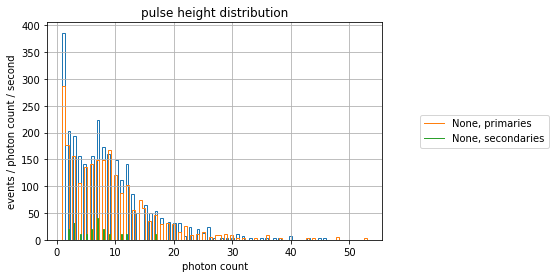

In [129]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


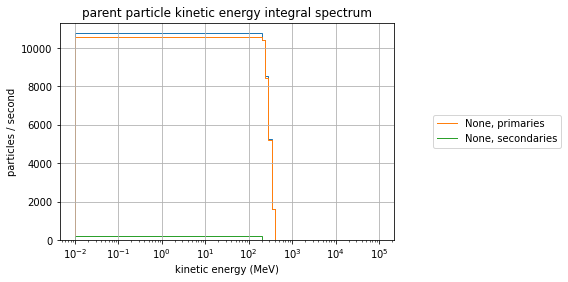

In [130]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_integral_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_integral_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_integral_primary_spectra()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(100, 1000)

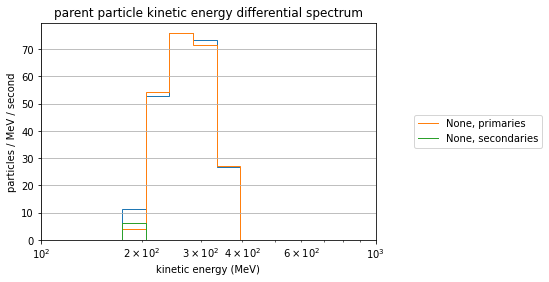

In [131]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
plt.xlim([100,1000])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


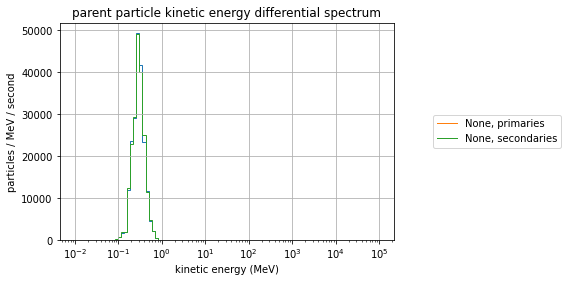

In [132]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()

(0.01, 10)

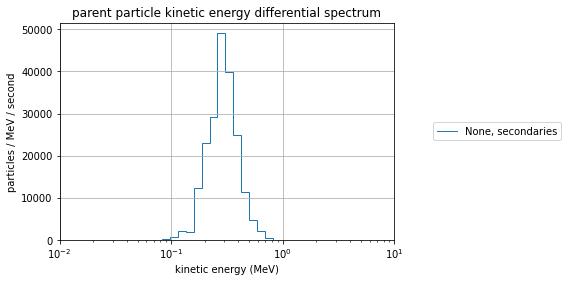

In [133]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
plt.xlim([0.01,10])

In [134]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
#test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
#test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_differential_primary_spectra()
#plt.xlim([100,1000])

283.7466125488281
284.27081298828125


In [135]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].primary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))

0.3211732506752014
333.9403076171875
0.3126011788845062


In [136]:
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.75))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.5))
print(test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.parent_particle_quantile(0.25))

0.37829306721687317
0.3126011788845062
0.2617133855819702


In [137]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].DF_of_output_hits["event_id"].sort_values().unique()

array([  165,   202,   300, ..., 99579, 99778, 99984], dtype=int32)

In [138]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL2_tuple_fluence;1_CK'].DF_of_output_hits["event_id"].sort_values().unique()

array([   89,   126,   127, ..., 99614, 99624, 99716], dtype=int32)

In [139]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].DF_of_output_hits["event_id"].sort_values().unique()

array([  165,   202,   300, ..., 99579, 99778, 99984], dtype=int32)

In [140]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['RA2_tuple_interaction;1'].DF_of_output_hits["event_id"].sort_values().unique()

array([   89,   126,   127, ..., 99614, 99624, 99716], dtype=int32)

In [141]:
test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

96.02001221275555+/-12.097384438111238

In [142]:
3 * test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

41.15143380546667+/-13.717144601822222

In [143]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

208.69579128217867+/-41.73915825643574

In [144]:
3 * test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

25.043494953861444+/-25.043494953861444

In [145]:
test_single_IRENE8_450_electrons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

83.47756521553583+/-83.47756521553583

In [146]:
3 * test_single_IRENE8_450_electrons_orbital_run_slight_short.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-250.4326956466075

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


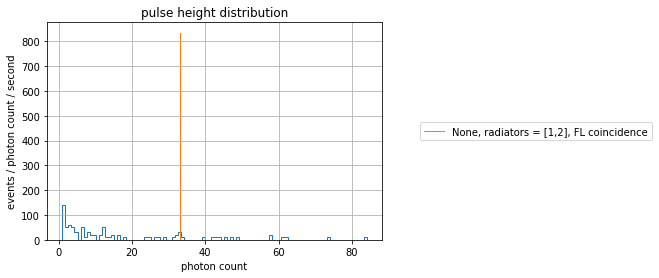

In [147]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


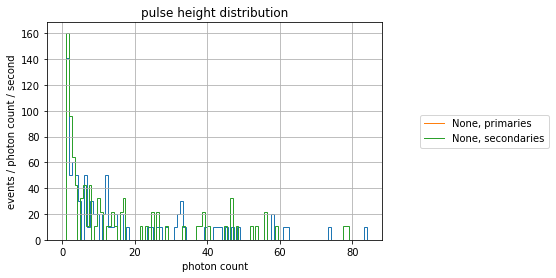

In [148]:
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].primary_particle_Cherenkov_tuple.plot_pulse_height_distribution()
test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution()

## Running for selected trapped electron regions

In [149]:
IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,1.125,1.375,1.625,1.875,2.125,2.375,2.625,2.875,...,3.625,3.875,4.125,4.375,4.625,4.875,5.25,5.75,6.25,6.75
843,-79.1385,323.613636,11178.0,5593.6,2407.4,1359.56,866.44,436.8,169.724,104.668,...,29.672,17.1352,10.8192,12.5496,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [150]:
high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == 843], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               save_DF_of_output_hits = False,
                                               ignore_coincidence_horns_regions=False)

0it [00:00, ?it/s]

________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7f8f9dee2d30>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7f8f711a6070>, Cherenkov_run_label=None, number_of_particles=100000000, number_of_radiators=2, save_DF_of_output_hits=False)


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photons_DF["total_energy"]*1e6)
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_pho

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["Si_detection_probability"] = photodetector_efficiency_interp(generated_photons_DF["wavelength_nm"])
/home/chrisswdavis/.local/lib/python3.8/site-packages/SpaceCherenkovSimulator/Cherenkov_run_tuple.py:341: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  generated_photons_DF["wavelength_nm"] = self.get_photon_wavelength_nm(generated_photon

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


1it [6:57:47, 25067.85s/it]

_________________wrapper_gras_Cherenkov_runner_from_objects - 25067.8s, 417.8min


In [151]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict

{843: <SpaceCherenkovSimulator.spectra_running_tools.gras_Cherenkov_runner_from_objects at 0x7f8f9dee27f0>}

In [152]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.10699317073782513+/-0.0149820406111185

In [153]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.10699317073782513+/-0.0149820406111185

In [154]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.estimated_number_of_incoming_particles

100000000

In [155]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].number_of_events_simulated

100000000

In [156]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.number_of_events_simulated

100000000

In [157]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843]

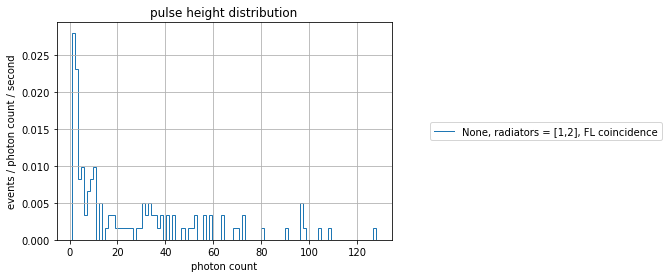

In [158]:
high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].plot_pulse_height_distribution()

In [159]:
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_SAA_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=100_000_000, #100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7f8fd87b6820>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7f8f711a6070>, Cherenkov_run_label=None, number_of_particles=100000000, number_of_radiators=2, save_DF_of_output_hits=False)


In [ ]:
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.08347839999118799

In [ ]:
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run = orbital_run(IRENE8_450_electrons_differential_shortened_single_orbit[IRENE8_450_electrons_differential_shortened_single_orbit.index == index_for_horns_max], 
                                               particle_species="e-",
                                               number_of_particles_to_simulate=10_000_000, #100_000_000,
                                               label="AE8 electrons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

1it [00:04,  4.68s/it]


In [ ]:
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.4166206271187851

## Running for selected trapped proton regions

In [ ]:
IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
843,-79.1385,323.613636,13188.2,5441.6,1622.53,244.996,43.574,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=1_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7f434bf1d790>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7f443b706070>, Cherenkov_run_label=None, number_of_particles=1000000, number_of_radiators=2, save_DF_of_output_hits=False)


0it [04:11, ?it/s]

successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


IndexError: single positional indexer is out-of-bounds

In [ ]:
high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[843].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-0.042254842164198295

In [ ]:
IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == 843]

,Latitude_deg,Longitude_deg,0.125,0.175,0.25,0.35,0.45,0.55,0.6499999999999999,0.85,...,25.0,35.0,45.0,55.0,65.0,85.0,125.0,175.0,250.0,350.0
843,-79.1385,323.613636,13188.2,5441.6,1622.53,244.996,43.574,-0.0,-0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [ ]:
index_for_SAA_max

826

In [ ]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_SAA_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=1_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

1it [00:01,  1.20s/it]


In [ ]:
SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

14.36334087770102+/-3.708598667682418

In [137]:
horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run = orbital_run(IRENE8_450_protons_original_differential_single_orbit[IRENE8_450_protons_original_differential_single_orbit.index == index_for_horns_max], 
                                               particle_species="proton",
                                               number_of_particles_to_simulate=100_000,#10_000_000,
                                               label="AP8 protons",
                                               threshold_photon_value=20.0,
                                               ignore_coincidence_horns_regions=False,
                                               save_DF_of_output_hits = False)

0it [00:00, ?it/s]

________________________________________________________________________________
[Memory] Calling SpaceCherenkovSimulator.spectra_running_tools.wrapper_gras_Cherenkov_runner_from_objects...
wrapper_gras_Cherenkov_runner_from_objects(<SpaceCherenkovSimulator.spectra_running_tools.particle_spectrum object at 0x7f78738d7d60>, 
<SpaceCherenkovSimulator.spectra_running_tools.spacecraft_shielding_geometry object at 0x7f79aa9fe8e0>, Cherenkov_run_label=None, number_of_particles=100000, number_of_radiators=2, save_DF_of_output_hits=False)
successfully read in data...
assigned wavelengths and detector detection probabilities...
calculated pulse height values.


0it [00:35, ?it/s]


IndexError: single positional indexer is out-of-bounds

In [ ]:
horns_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]["FL"].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value=20.0)

0.0+/-7.129819707734761

## Running across multiple rigidities

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


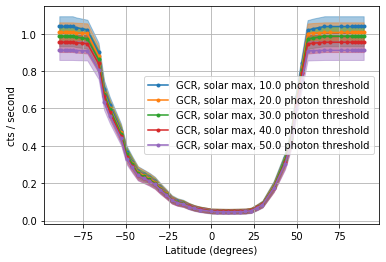

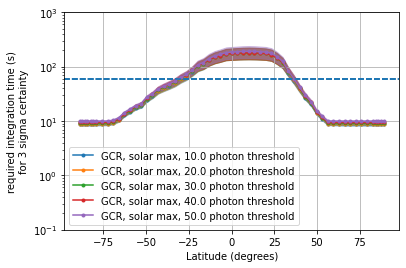

In [130]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                       datetime_to_use=SRT.datetime_for_GCR_solar_max, 
                       input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]], 
                       label = f"GCR, solar max, {photon_threshold} photon threshold", 
                       number_of_radiators=2, 
                       threshold_photon_value=photon_threshold).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GCR_Cherenkov_run_rigidity_cut_off,
                       datetime_to_use=SRT.datetime_for_GCR_solar_max,
                       input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                       label = f"GCR, solar max, {photon_threshold} photon threshold", 
                       number_of_radiators=2,
                       threshold_photon_value=photon_threshold).plot_int_time_array_vs_longitude_0()
plt.legend()

In [124]:
GLE21_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE21spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE21_integral_count_rate)

GLE05_spectrum = SRT.particle_spectrum(particle_species=SRT.particle("proton"),
                                        spectrum_file_path="GLE05spectrum_multipliedby1.csv",
                                        incoming_particles_per_s_per_cm2=SRT.GLE05_integral_count_rate)

multi_rigidity_GLE21 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label="GLE21 protons",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

multi_rigidity_GLE05 = multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label="GLE05 protons",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=20.0,
                                          number_of_particles=1_000_000)

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


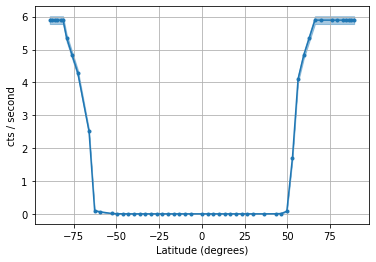

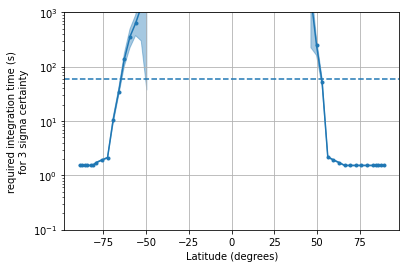

In [ ]:
multi_rigidity_GLE21.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE21.plot_int_time_array_vs_longitude_0()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


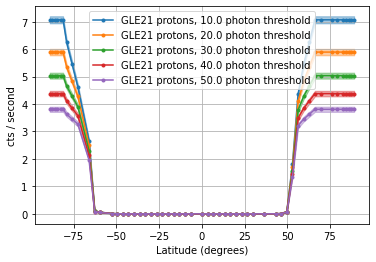

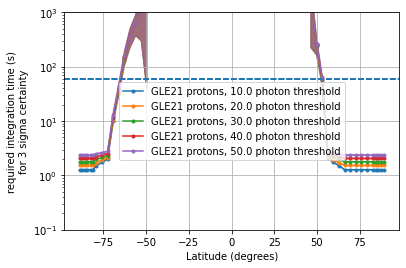

In [129]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE21 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE21_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

running MAGNETOCOSMICS to acquire asymptotic directions...
running MAGNETOCOSMICS to acquire asymptotic directions...


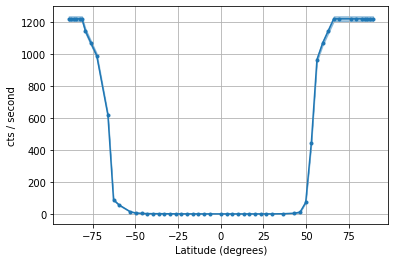

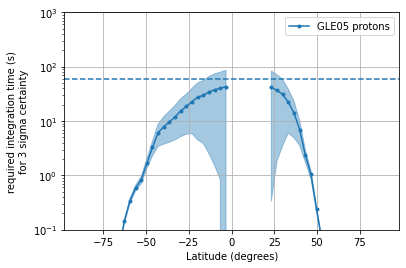

In [ ]:
multi_rigidity_GLE05.plot_count_rates_against_longitude_0()
plt.figure()
multi_rigidity_GLE05.plot_int_time_array_vs_longitude_0()
plt.legend()

In [136]:
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_count_rates_against_longitude_0()
plt.legend()

plt.figure()
for photon_threshold in [10.0,20.0,30.0,40.0,50.0]:
    multi_rigidity_run(SRT.get_GLE_Cherenkov_run_rigidity_cut_off,
                                          label=f"GLE05 protons, {photon_threshold} photon threshold",
                                          input_DF_of_coords=IRENE8_450_protons_differential_single_orbit[["Latitude_deg","Longitude_deg"]],
                                          number_of_radiators=2,
                                          array_of_rigidities_GV=default_rigidities,
                                          GLE_spec=GLE05_spectrum,
                                          threshold_photon_value=photon_threshold,
                                          number_of_particles=1_000_000).plot_int_time_array_vs_longitude_0()
plt.legend()

KeyboardInterrupt: 

In [ ]:
spacecraft_coords_DF

,ModifiedJulianDay,Altitude_km,Latitude_deg,Longitude_deg,LocalTime_hrs,PitchAngle_deg
0,18628.000000,1192.835,0.000000,354.938757,23.662584,90.0
1,18628.000694,1192.891,3.313331,354.688073,23.662538,90.0
2,18628.001389,1193.060,6.626412,354.437390,23.662493,90.0
3,18628.002083,1193.338,9.939000,354.186707,23.662447,90.0
4,18628.002778,1193.722,13.250860,353.936025,23.662402,90.0
...,...,...,...,...,...,...
1088,18628.755556,1193.970,-13.371240,82.192904,23.612860,90.0
1089,18628.756250,1193.583,-10.059640,81.942378,23.612825,90.0
1090,18628.756944,1193.301,-6.747288,81.691850,23.612790,90.0
1091,18628.757639,1193.129,-3.434439,81.441319,23.612755,90.0


In [118]:
def soft_divide(numerator, denominator):

    try:
        return numerator / denominator
    except ZeroDivisionError:
        return ufloat(0.0,0.0)

In [117]:
def calculate_int_time_functional(x_value, signal_flux_func, list_of_background_flux_functions, sigma=3):

    signal_flux = signal_flux_func(x_value)
    signal_flux_modified = np.array([(signal if signal.n != 0.0 else ufloat(np.nan,np.nan)) for signal in signal_flux])

    numerator = (signal_flux_modified + sum([background_flux_func(x_value) for background_flux_func in list_of_background_flux_functions]))

    return (sigma**2) * numerator / (signal_flux_modified**2) 

In [115]:
def plot_world_map():
    worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

    # Creating axes and plotting world map
    fig, ax = plt.subplots(figsize=(12, 6))
    worldmap.plot(color="lightgrey", ax=ax)

In [116]:
def long_east_to_west(longitude_east):

    if longitude_east > 180:
        output_longitude = longitude_east - 360.0
    else:
        output_longitude = longitude_east

    return output_longitude

In [114]:
class full_orbit_background():

    def __init__(self, 
                 DF_of_coordinates:pd.DataFrame, 
                 list_of_multi_rigidity_runs = [],
                 list_of_orbit_background_runs = [],
                 label=None,
                 datetime_for_rigidities = SRT.datetime_for_GCR_solar_max):

        self.DF_of_coordinates = DF_of_coordinates
        self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index
        self.list_of_multi_rigidity_runs = list_of_multi_rigidity_runs
        self.list_of_orbit_background_runs = list_of_orbit_background_runs
        self.label = label

        self.rigidities_for_coordinates = AsympDirsTools.get_magcos_vcutoffs(array_of_lats_and_longs = DF_of_coordinates[["Latitude_deg","Longitude_deg"]].values,
                                            dateAndTime=datetime_for_rigidities,cache=True)
        self.rigidities_for_coordinates = self.rigidities_for_coordinates[
            #np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -81.194370) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 72.753770) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -56.147930) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -69.295260) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 39.842640) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 42.992710) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != -3.229399) &
            np.array(self.rigidities_for_coordinates.reset_index()["initialLatitude"] != 33.233800)]  
        self.rigidities_for_coordinates.iloc[5] = self.rigidities_for_coordinates.iloc[4]

        self.rig_interp_list = []
        for multi_rigidity_run in list_of_multi_rigidity_runs:
            count_rate_DF = pd.DataFrame(self.rigidities_for_coordinates["Reffective"].copy())
            count_rate_DF["count_rate"] = multi_rigidity_run.rig_interp(count_rate_DF["Reffective"])

            list_of_sub_coordinates = []
            for index, row in count_rate_DF.reset_index().iterrows():
                relevant_coord = self.DF_of_coordinates[self.DF_of_coordinates["Latitude_deg"] == row["initialLatitude"]]
                list_of_sub_coordinates.append(relevant_coord)
            DF_of_sub_coordinates = pd.concat(list_of_sub_coordinates).reset_index()
            count_rate_DF = pd.concat([count_rate_DF.reset_index(),DF_of_sub_coordinates],axis=1).sort_values(by="index")
            count_rate_DF.label = multi_rigidity_run.label

            self.rig_interp_list.append(count_rate_DF)


        self.dict_of_interp_functions = {}
        dict_index = 0
        for interped_rig in self.rig_interp_list:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=interped_rig["index"],y=interped_rig["count_rate"])
            self.dict_of_interp_functions[dict_index].label = interped_rig.label
            dict_index += 1

        for orbit_background_run in self.list_of_orbit_background_runs:
            self.dict_of_interp_functions[dict_index] = uncertainty_interp1d(x=orbit_background_run.run_dict_event_counts.index,
                                                            y=orbit_background_run.run_dict_event_counts.values)
            self.dict_of_interp_functions[dict_index].label = orbit_background_run.label
            dict_index += 1

    def plot_cosmic_particles(self, xcol_to_plot_against="orbital_step", indicies=":", error_bar_function=plt.errorbar):

        if indicies == ":":
            rig_interp_list = self.rig_interp_list
        else:
            rig_interp_list = [self.rig_interp_list[indicies]]
        
        for interped_rig in rig_interp_list:
            #interped_rig.plot("index","count_rate",ax=plt.gca())
            error_bar_function(interped_rig[xcol_to_plot_against],
                     interped_rig["count_rate"].apply(lambda x:x.n),
                     interped_rig["count_rate"].apply(lambda x:x.std_dev),
                     label=interped_rig.label)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_count_rates(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        for orbit_background_run in self.list_of_orbit_background_runs:
            orbit_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_cosmic_vs_trapped(self, xcol_to_plot_against="orbital_step",error_bar_function=plt.errorbar):

        self.plot_cosmic_particles(xcol_to_plot_against,error_bar_function=error_bar_function)

        first_sum = True
        for orbit_background_run in self.list_of_orbit_background_runs:
            if first_sum is True:
                total_background_run = orbit_background_run
                first_sum=False
            else:
                total_background_run = total_background_run + orbit_background_run
                
        total_background_run.plot_run_dict(xvalues_to_use = self.DF_of_coordinates[xcol_to_plot_against],error_bar_function=error_bar_function)

        if xcol_to_plot_against is "Latitude_deg":
            plt.xlabel("Latitude (degrees)")
        else:
            plt.xlabel(xcol_to_plot_against)
        plt.ylabel("counts / second")
        plt.legend()

    def plot_int_time(self, signal_index=0, xcol_to_plot_against="orbital_step"):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates[xcol_to_plot_against]

        #plt.plot(self.DF_of_coordinates.index, output_int_time_values)
        # plt.errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
        #              [time_value.n for time_value in output_int_time_values],
        #              [time_value.std_dev for time_value in output_int_time_values])
        
        fill_between_errorbar(xvals_to_plot_against, #self.DF_of_coordinates.index,
                     [time_value.n for time_value in output_int_time_values],
                     [time_value.std_dev for time_value in output_int_time_values],
                     label=signal_interp_function.label)

        plt.axhline(60,ls="--")
        plt.xlabel(xcol_to_plot_against)
        plt.ylabel("required integration time (s)\nfor 3 sigma certainty")
        plt.ylim([0.1,1000])
        plt.yscale("log")
        plt.grid(True)
        plt.legend()

        #return output_int_time_values

    def plot_spacecraft_trajectory(self):

        plot_world_map()

        self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)

        sns.scatterplot(data=self.DF_of_coordinates,x="Longitude_east_deg",y="Latitude_deg")

    def get_count_rate_info(self, signal_index=0):

        print(f"polar count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_polar]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"horns count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_horns_max]['count_rate'].iloc[0]}".replace("+/-","±"))
        print(f"SAA count rate is: {self.rig_interp_list[signal_index][self.rig_interp_list[signal_index]['index'] == index_for_SAA_max]['count_rate'].iloc[0]}".replace("+/-","±"))

    
    def get_int_time_info(self, signal_index=0, account_for_background=True):

        signal_interp_function = self.dict_of_interp_functions[signal_index]
        keys_array = np.array(list(self.dict_of_interp_functions.keys()))
        background_indicies = keys_array[keys_array != signal_index]
        if account_for_background==True:
            background_interp_function_list = [self.dict_of_interp_functions[index] for index in background_indicies]
        else:
            background_interp_function_list = [lambda x:0]

        # signal_values = signal_interp_function(self.DF_of_coordinates.index)
        # background_values = background_interp_function(self.DF_of_coordinates.index)

        output_int_time_values = calculate_int_time_functional(self.DF_of_coordinates.index, 
                                                               signal_interp_function, 
                                                               background_interp_function_list,
                                                               sigma=3)

        xvals_to_plot_against = self.DF_of_coordinates["orbital_step"]

        print(f"polar int time is: {output_int_time_values[xvals_to_plot_against == index_for_polar][0]}".replace("+/-","±"))
        print(f"horns int time is: {output_int_time_values[xvals_to_plot_against == index_for_horns_max][0]}".replace("+/-","±"))
        print(f"SAA int time is: {output_int_time_values[xvals_to_plot_against == index_for_SAA_max][0]}".replace("+/-","±"))
        

<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_16912/100066915.py:101: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if xcol_to_plot_against is "Latitude_deg":


In [120]:
default_trajectory_DF = spacecraft_coords_DF.iloc[790:850]
default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)

/tmp/ipykernel_16912/3269862290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  default_trajectory_DF["Minutes"] = (default_trajectory_DF["ModifiedJulianDay"] - default_trajectory_DF["ModifiedJulianDay"].iloc[0]) * (24 * 60)


/tmp/ipykernel_16912/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_16912/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


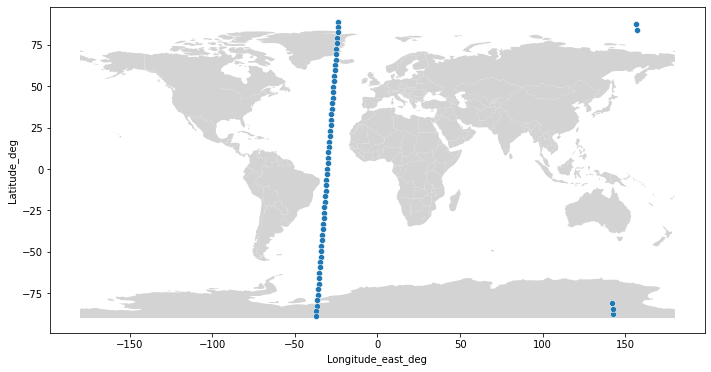

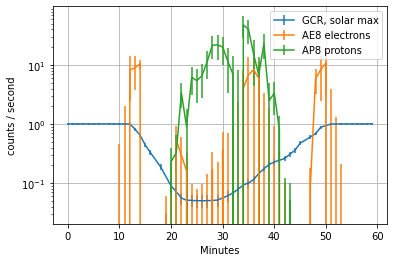

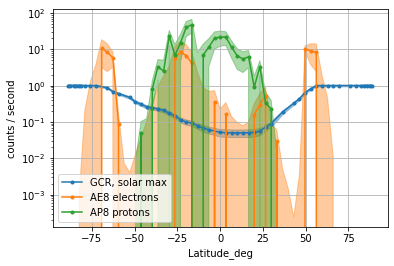

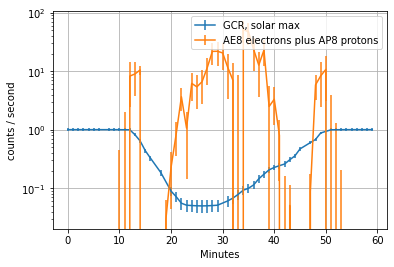

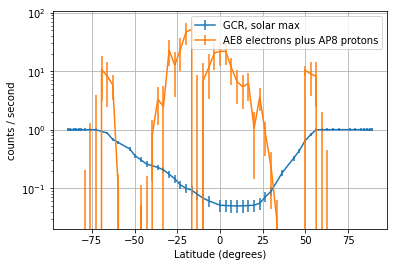

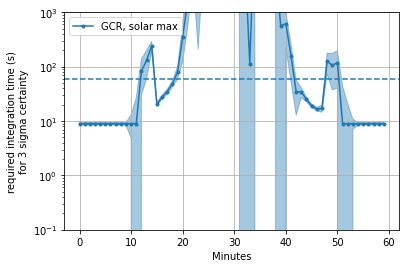

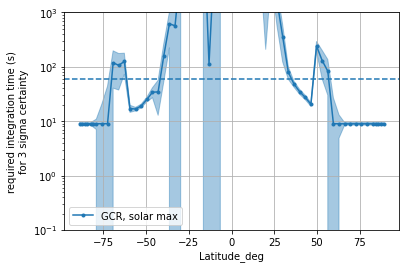

In [149]:
GCR_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run],
                                              label="GCR protons, solar max")
GCR_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg",error_bar_function=fill_between_errorbar)
plt.figure()
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()

GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg")

plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Minutes")
plt.figure()
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")


/tmp/ipykernel_16912/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_16912/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


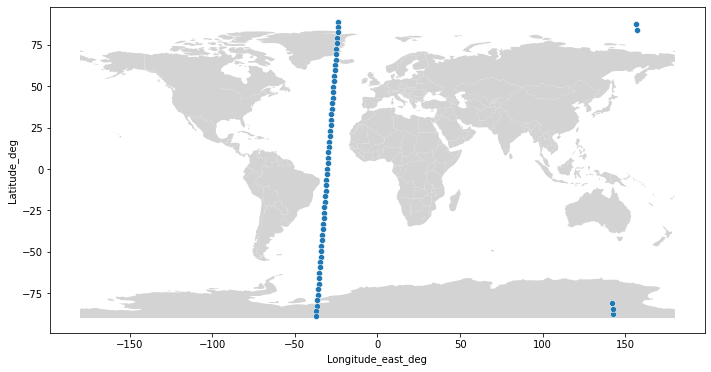

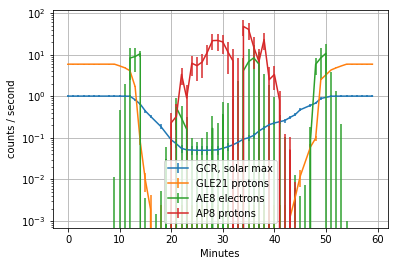

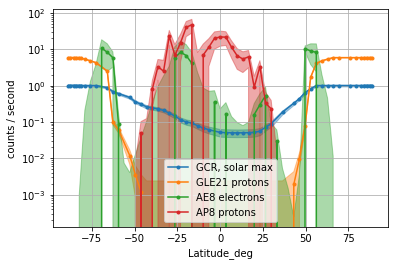

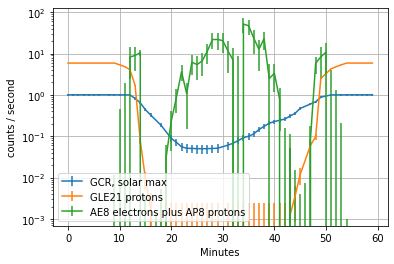

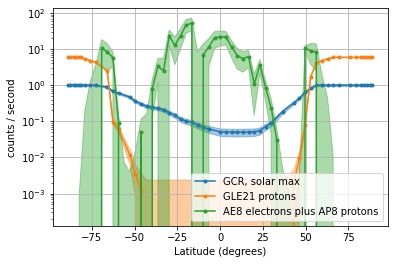

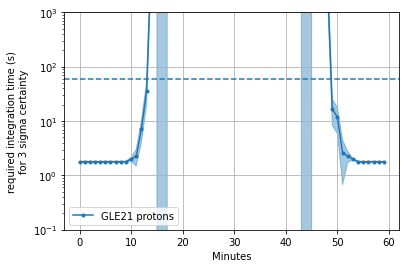

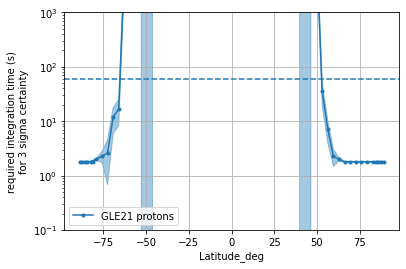

In [126]:
GLE21_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE21],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])
GLE21_orbit_background.plot_spacecraft_trajectory()
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_count_rates(xcol_to_plot_against="Latitude_deg",error_bar_function=fill_between_errorbar)
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg",error_bar_function=fill_between_errorbar)
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

/tmp/ipykernel_16912/100066915.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["orbital_step"] = self.DF_of_coordinates.index


running MAGNETOCOSMICS to acquire asymptotic directions...


/tmp/ipykernel_16912/100066915.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.DF_of_coordinates["Longitude_east_deg"] = self.DF_of_coordinates["Longitude_deg"].apply(long_east_to_west)


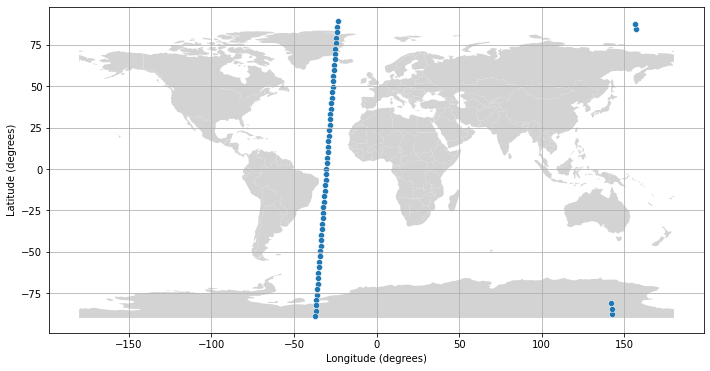

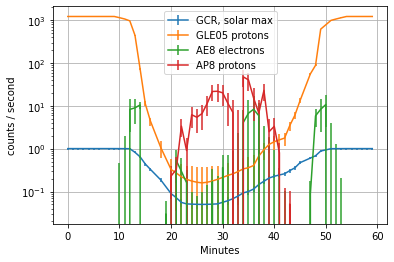

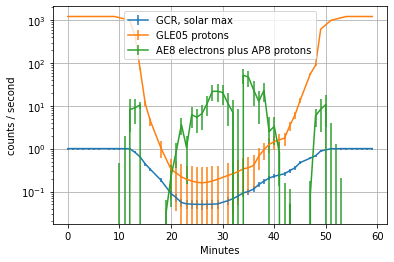

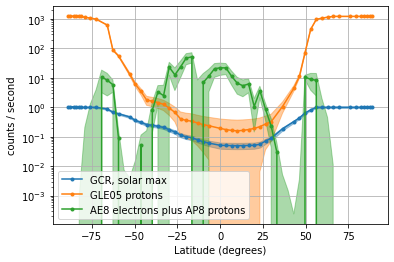

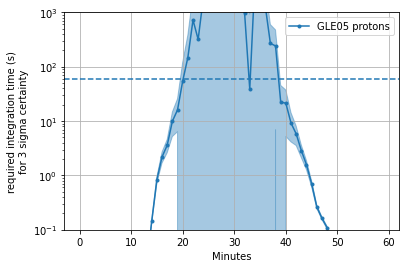

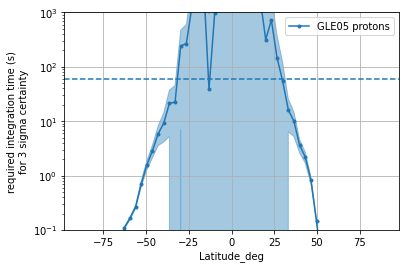

In [128]:
GLE05_orbit_background = full_orbit_background(default_trajectory_DF,
                                              list_of_multi_rigidity_runs=[GCR_max_multi_rig_run,multi_rigidity_GLE05],
                                              list_of_orbit_background_runs=[IRENE8_450_electrons_orbital_run,IRENE8_450_protons_orbital_run])

GLE05_orbit_background.plot_spacecraft_trajectory()
plt.xlabel("Longitude (degrees)")
plt.ylabel("Latitude (degrees)")
plt.grid(True)
plt.figure()
GLE05_orbit_background.plot_count_rates(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg",error_bar_function=fill_between_errorbar)
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Minutes")
plt.figure()
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


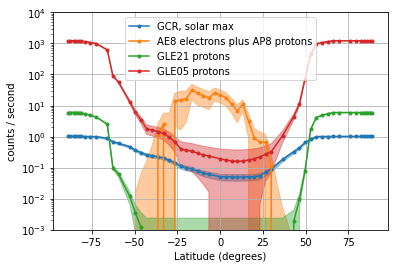

In [ ]:
GCR_orbit_background.plot_cosmic_vs_trapped(xcol_to_plot_against="Latitude_deg", error_bar_function=fill_between_errorbar)
GLE21_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)
GLE05_orbit_background.plot_cosmic_particles(xcol_to_plot_against="Latitude_deg",indicies=1, error_bar_function=fill_between_errorbar)

plt.xlabel("Latitude (degrees)")

plt.ylim([1e-3,1e4])

save_figure_for_paper("GLEs_output_coincidence")


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


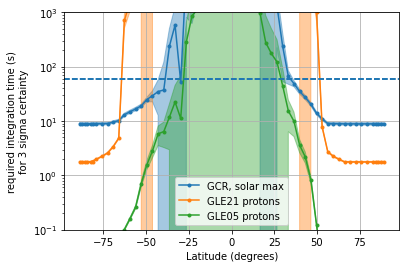

In [ ]:
GCR_orbit_background.plot_int_time(signal_index=0,xcol_to_plot_against="Latitude_deg")
GLE21_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")
GLE05_orbit_background.plot_int_time(signal_index=1,xcol_to_plot_against="Latitude_deg")

plt.xlabel("Latitude (degrees)")

save_figure_for_paper("GLEs_req_int_time_coincidence")

In [ ]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


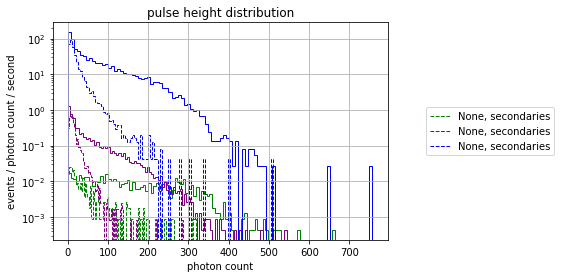

In [133]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

In [132]:
def plot_phd_modified(pulse_height_distribution,nbins=100,**xargs):

        # self.pulse_height_values["Si_detection_probability"].hist(bins=100,**xargs)
        
        hist_values = np.histogram(pulse_height_distribution.pulse_height_values,bins=nbins)

        normalised_counts = hist_values[0] / pulse_height_distribution.estimated_observation_time_in_seconds
        plt.stairs(normalised_counts / np.diff(hist_values[1]),hist_values[1],label=pulse_height_distribution.label,**xargs)
        plt.grid(True)
        plt.xlabel("photon count")
        plt.ylabel("events / photon count / second")
        plt.title("pulse height distribution")
        plt.legend(loc="center left",bbox_to_anchor=(1.1,0.5))

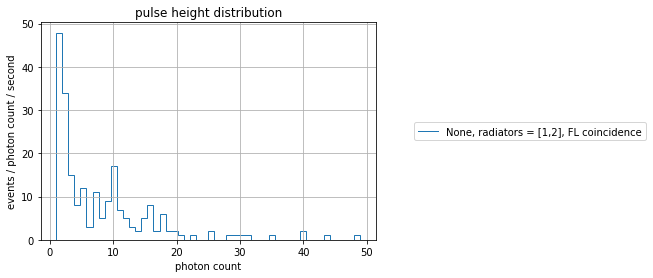

In [ ]:
plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=50)

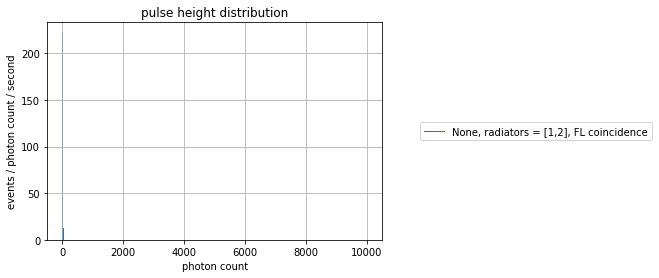

In [ ]:
plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=np.geomspace(1e0,1e4,50))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run' is not defined

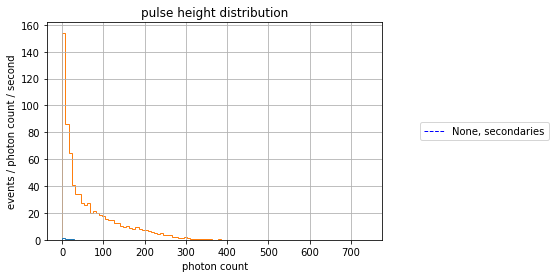

In [134]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution(color="blue",zorder=10)
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution(zorder=9)
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()

plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].pulse_height_distribution_monte_carlo,nbins=10)
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'].plot_pulse_height_distribution()

plt.legend(["GCR protons","GCR protons,\nsecondaries only","GLE21 protons","GLE05 protons","AP-8 protons,\nSAA","AE-8 electrons,\nhorns region","AE-8 electrons,\nSAA"])

plt.yscale("log")
plt.xscale("log")

plt.xlim([1e1,1e4])
plt.ylim([1e-4,1e3])

plt.ylabel(r"events / $\Delta$ photon count / second")

save_figure_for_paper("GLE_pulse_height")

NameError: name 'SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run' is not defined

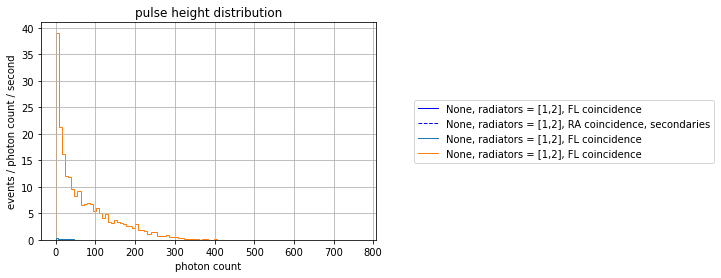

In [135]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution(color="blue",zorder=10)
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution(zorder=9)
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plot_phd_modified(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].pulse_height_distribution_monte_carlo,nbins=10)
horns_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_horns_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()
SAA_max_high_stats_test_single_IRENE8_450_electrons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.coincidence_tuple_dictionary[1][2]['FL'].plot_pulse_height_distribution()

plt.legend(["GCR protons","GCR protons,\nsecondaries only","GLE21 protons","GLE05 protons","AP-8 protons,\nSAA","AE-8 electrons,\nhorns region","AE-8 electrons,\nSAA"])

plt.yscale("log")
plt.xscale("log")

plt.xlim([1e1,1e4])
plt.ylim([1e-4,1e3])

plt.ylabel(r"events / $\Delta$ photon count / second")

save_figure_for_paper("GLE_pulse_height_coincidence")

In [ ]:
dir(SAA_max_high_stats_test_single_IRENE8_450_protons_orbital_run.run_dict[index_for_SAA_max].outputted_tuple.output_tuples['FL1_tuple_fluence;1_CK'])

['Cherenkov_run_label',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_more_columns_to_generated_photons_DF',
 'determine_pulse_height_distributions',
 'get_fractions_of_particle_types',
 'get_photon_wavelength_nm',
 'incoming_particles_per_second',
 'number_of_events_simulated',
 'plot_differential_primary_spectra',
 'plot_integral_primary_spectra',
 'plot_pulse_height_distribution',
 'plot_smoother_pulse_height_distribution',
 'primary_particle_Cherenkov_tuple',
 'pulse_height_distribution_averaged_method',
 'pulse_height_distribution_monte_carlo',
 'random_reject_pde',
 'secondary_particle_Cherenkov_tuple',
 'threshold_primary_energy']

In [ ]:
print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0) / \
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.output_tuples['RA1_tuple_interaction;1'].pulse_height_distribution_monte_carlo.get_total_photon_inducing_event_count_per_second(threshold_photon_value = 20.0))

16.7+/-1.4
15.5+/-0.5
13.49+/-0.29


(0.0001, 10000.0)

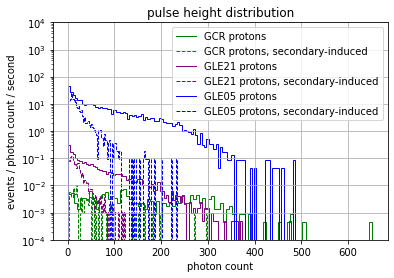

In [ ]:
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="green")
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="green",ls="--")

GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="purple")
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="purple",ls="--")

GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].plot_pulse_height_distribution(color="blue")
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.plot_pulse_height_distribution(color="blue",ls="--")

plt.yscale("log")

plt.legend([
    "GCR protons",
    "GCR protons, secondary-induced",
    "GLE21 protons",
    "GLE21 protons, secondary-induced",
    "GLE05 protons",
    "GLE05 protons, secondary-induced",
])

plt.ylim([1e-4,1e4])

In [ ]:
print(100 * GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GCR_orbit_background.list_of_multi_rigidity_runs[0].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE21_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

print(100 * GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].secondary_particle_Cherenkov_tuple.pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0) / \
GLE05_orbit_background.list_of_multi_rigidity_runs[1].array_of_rig_cutoff_runs[0][1].outputted_tuple.coincidence_tuple_dictionary[1][2]['RA'].pulse_height_distribution_monte_carlo.get_total_photon_count_per_second(threshold_photon_value = 20.0))

5.75+/-0.10
5.75+/-0.05
5.269+/-0.030


In [ ]:
GCR_orbit_background.get_count_rate_info(signal_index=0)

polar count rate is: 1.01±0.05
horns count rate is: 0.88±0.05
SAA count rate is: 0.112±0.018


In [ ]:
GLE21_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 5.94±0.12
horns count rate is: 2.51±0.07
SAA count rate is: 0.0000±0.0024


In [ ]:
GLE05_orbit_background.get_count_rate_info(signal_index=1)

polar count rate is: 1215±16
horns count rate is: 619±10
SAA count rate is: 0.41±0.29


In [143]:
GCR_orbit_background.get_int_time_info(signal_index=0)

polar int time is: 8.9±0.5
horns int time is: (1.1±0.7)e+02
SAA int time is: (1.6±1.1)e+04


In [144]:
GLE21_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 1.79±0.04
horns int time is: 17±8
SAA int time is: nan±nan


In [145]:
GLE05_orbit_background.get_int_time_info(signal_index=1)

polar int time is: 0.00738±0.00010
horns int time is: 0.01478±0.00029
SAA int time is: (1.3±2.0)e+03


In [ ]:
GCR_orbit_background.get_int_time_info(signal_index=0,account_for_background=False)

polar int time is: 8.9±0.5
horns int time is: 10.2±0.6
SAA int time is: 81±13


In [ ]:
GLE21_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 1.515±0.030
horns int time is: 3.58±0.09
SAA int time is: nan±nan


In [ ]:
GLE05_orbit_background.get_int_time_info(signal_index=1,account_for_background=False)

polar int time is: 0.00740±0.00010
horns int time is: 0.01454±0.00024
SAA int time is: 22±16


In [142]:
IRENE8_450_electrons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 8±6 cts/s
SAA region count rate: 8±8 cts/s


In [146]:
IRENE8_450_protons_orbital_run.print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 0.0±0 cts/s
SAA region count rate: 15±11 cts/s


In [147]:
(IRENE8_450_electrons_orbital_run + IRENE8_450_protons_orbital_run).print_count_rates_info()

polar region count rate: 0.0±0 cts/s
horns region count rate: 8±6 cts/s
SAA region count rate: 24±14 cts/s
